# COVID-19: Pandemic’s Impact On Mental Health

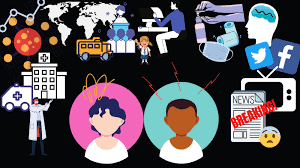



**Team Members:** Aftab Alam, Anusha Dhar, Sahana Bhat


**NetIDs:** aftaba@uw.edu, anusha4@uw.edu, svbhat@uw.edu

# Problem Statement

The COVID-19 pandemic has severely affected people’s daily life and caused tremendous economic loss. 
To reduce the spread of COVID, the Government had strict rules such as  Lockdown, travel restrictions, and social distancing. These scenarios have increased stress and anxiety among people.
Economic impact of covid-19 is widely researched but what mental impact the drastic life changes bring to people and how to quantify it at the population level are yet to be studied. 




Our objective is to analyze Twitter data to understand the sentiments of the people during the COVID timeline, i.e through its offset, raise and peak period. We will be performing text analysis of the Tweets to identify any correlation between the COVID events and topics of mental health issues.


#Research Questions

* **Do Twitter users discuss mental health issues on social media?**
* **Is there a correlation between events such as strict lockdown, WHO declaring global pandemic and mental health discussion in online communities?**
* **How does mental health related conversation changes duing the course of COVID-19 spread?**
* **How does availability of vaccines affect the sentiments of the people with respect to COVID?**


# Our Approach 

We will be harvesting Twitter data for a period of one year. Twitter has provided us Academic Research access to the Twitter API, which allows us to access Twitter archive data. We are also planning to include data from a survey we plan to conduct if time permits.

Since the analysis was published prior to the distribution of vaccines, we will also account for that along with events such as lockdown in our analysis to notice how the topic of conversation has changed due to major events. 


Initially we wanted to extend our research to account for several geographic regions to notice if there are any similarities in how people have been talking about mental health during the pandemic. However, given the nature of the Twitter archive we were unable to collect geographic data and have chosen to provide a global trend analysis.



We plan to implement NLP algorithms such as topic modelling and classification and clustering algorithms to conduct our analysis.

We believe that building off the research by Low can help us successfully include a larger demographic and potentially find newer trends in what people discuss on different online communities over the world. 

We will also be analyzing the major events along the COVID timeline to identify if this is reflected in the Tweets. The important COVID time line events that we are focusing on are:

| Event Date     | Description |
| ----------- | ----------- |
| December 31, 2019      | Chinese Health officials inform the WHO about a cluster of 41 patients with a mysterious pneumonia. Most are connected to Huanan Seafood Wholesale Market      |
| January 30, 2020   | WHO declares a global public-health emergency        |
|January 31, 2020|President Trump bans foreign nationals from entering the US if they had been in China within the prior two weeks|
|February 11, 2020|WHO announces that the disease caused by the novel coronavirus will be called "COVID-19."|
|April 2, 2020|The world passes 1 million COVID-19 infections.|
|May 21, 2020| The number of global COVID-19 cases surpasses 5 million.|
|September 28, 2020 | Global deaths surpass 1 million|
|November 9, 2020 | Global cases top 50 million|
|December 2, 2020 | The UK authorizes Pfizer and BioNtech's vaccine|
|December 18, 2020 | The FDA authorizes Moderna's, Pfizer's and BioNTech's COVID-19 vaccine|

The dates for the events have been referenced from https://www.businessinsider.com/coronavirus-pandemic-timeline-history-major-events-2020-3


# Dataset

We used the `searchtweets-v2.0` python package for collecting tweets from 2020-01-01 to 2021-02-27. In our data collection process, we used two types of key words. 

**Keywords**
**covid_search_term** = `"Asymptomatic OR Coronavirus OR (Community spread) OR Ventilator OR PPE (Social distancing) OR (Self isolation) OR (Self quarantine) OR (Shelter in place) OR mask OR N95 OR (Herd immunity) OR Vaccine OR COVID" ` 

**mental_search_term** = `"(mental health) OR depression OR stress OR addiction OR alcoholism OR anxiety OR (health anxiety) OR lonely OR ptsd OR schizophrenia OR (social anxiety) OR suicide OR meditation OR therapy OR counsel OR emotion"`

We have collected data using the standard API as well as the academic research fullarchive which has given us access to the following datasets: 
  
* **Historical data** : 
For historical data, we can selected ~10000 tweets per day for each of keywords type. We noticed that twitter API returns non-english tweets as well even if we give `lang:en` filter.  Such tweets are removed from our data set. We would be using this to compare our results to the follwoing dataset. 
* **2 weeks data with Geolocation**: 
We have also collected 3 weeks recent tweets using twitter standard API. In this search we were able to filter tweets by geolocation. We did this search with 15 cities across the globe. Using this dataset, we will be checking how different cities around world have reacted to vaccine related news in the month of Feburary 2021.
                    
For **geographical data**, we have selected 15 metropolitan cities across globe. These cities represent diverse population and political spectrum. They also differ in severity of impact. We think data from these cities would be good representative of typical urban population with good social media presence. 

These cities include `'New York','Seattle','Hawaii', 'Miami', 'London', 'Mumbai', 'Delhi', 'Seoul', 'Singapore', 'Tokyo', 'Rome', 'Auckland', 'Syndey', 'Cape Town', 'Manaus-Brazil'`

The **historical data** was collected for a period of one year. Twitter has provided us Academic Research access to the Twitter API, which allows us to access Twitter archive data. The historical data will help us to accoun for the events along the time line of the COVID.

The keywords used to search and mine the Tweets were seperated. First, we mined the Tweets related to COVID keywords only, which includes 3078964 records of unique data. We later mined the Tweets related to Mental health keywords only and these include 3760095 records. The two datasets collected were merged based on their Tweet IDs to identify the Tweets which contain both the COVID and Mental health realted terms. 


### Mount Google drive
Using Google shared drive so that each team member have access to same data

In [ ]:
# Mounting respective Google Drives
from google.colab import drive
drive.mount('/gdrive')
!ls /gdrive/

Mounted at /gdrive
MyDrive  Shareddrives


In [ ]:
# Declaring paths to respective drives
!ls /gdrive/MyDrive/
DATA_PATH ='/gdrive/Shareddrives/IMT-547/data'
!ls /gdrive/Shareddrives/IMT-547/data | grep corona

# Data mining & preparation

Install and import required library





In [ ]:
%%shell
# Installing all requirments
pip install tweepy==3.10.0
#pip install praw
pip install nltk
pip install wordcloud
pip install searchtweets-v2==1.0.6 # twitter early access APIv2.0 for academic reasearch access


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tweepy 
import json
import time

# Enabling flag to all 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib
import matplotlib.pyplot as plt

## Historical Data collection

Using the following code, we split the data collection among our teammates and combined the collected data.

In [ ]:
# each team member ran this code for different timeframe locally and the uploaded data in shared google drive for clean up
# and analysis
from datetime import datetime,timedelta 
from searchtweets import collect_results
from searchtweets import ResultStream, load_credentials, gen_request_parameters
import requests
import json

def credential_args(filename="~/.credential.yaml",yaml_key="search_tweets_premium"):
    premium_search_args = load_credentials(filename,
                                       yaml_key=yaml_key,
                                       env_overwrite=False)
    return premium_search_args

def search_rules(q, filters=None, fromdate=None, todate=None, results_per_call=500,tag="covid"):
    #"[query,start_time,end_time,since_id,until_id,max_results,next_token,expansions,tweet.fields,media.fields,poll.fields,place.fields,user.fields]"
        query = q
        if filters:
            query = q + ' ' + filters
        rule = gen_request_parameters(query= query, start_time=fromdate, end_time=todate, expansions="geo.place_id,author_id",
                                        results_per_call = results_per_call,
                                        user_fields="id,location,verified",place_fields="place_type,name,country_code",
                                        tweet_fields="id,created_at,text,in_reply_to_user_id,lang,geo,author_id,possibly_sensitive,public_metrics") 
        #{"tweet.fields":[attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,id,in_reply_to_user_id,lang,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,text,withheld]"}]
        return rule
  
def fetch_results(query_rule,result_stream_args,max_results=100):
    tweets = collect_results(query_rule,
                            max_tweets=max_results,
                            result_stream_args=result_stream_args) # change this if you need to
    return tweets

def search_geocity(query,headers):
    endpoint='https://api.twitter.com/1.1/geo/search.json'
    params = {'query':query,'granularity':'neighborhood','trim_place':'true'}
    res = requests.get(url=endpoint, params=params, headers=headers)
    print(res.text)

if __name__=='__main__':
    START_OVER = False
    MAX_TWEETS = 10000
    if START_OVER:
        with open('tweets_response.csv','w') as tweet_f:
            tweet_f.write('tweet_id|created_at|author_id|language|inreply_to|possibly_sensitive|retweet_count|reply_count|like_count|quote_count|search_type|search_city')
        with open('tweets_users.csv','w') as user_f:
            f.write('author_id|id|location|verified')
        with open('tweets_place.csv','w') as place_f:
            user_f.write('place_id|place_type|name|country_code')
    
    search_args = credential_args(filename="./credential.yaml",yaml_key="search_tweets_premium")
    covid_search_term = "Asymptomatic OR Coronavirus OR (Community spread) OR Ventilator OR PPE (Social distancing) OR (Self isolation) OR (Self quarantine) OR (Shelter in place) OR mask OR N95 OR (Herd immunity) OR Vaccine OR COVID"
    mental_search_term = "(mental health) OR depression OR stress OR addiction OR alcoholism OR anxiety OR (health anxiety) OR lonely OR ptsd OR schizophrenia OR (social anxiety) OR suicide OR meditation OR therapy OR counsel OR emotion OR crazy"
    keywords = {'covid_search':covid_search_term,'mental_search': mental_search_term}
    dates = ["2020-01-01","2020-04-01","2020-07-01","2020-10-01","2021-01-01"]
    error_tweets= {}
    error_id = 0
    for START_DATE in dates:
        default_place={'place_id':0}
        for i in range(0,31,1):
            datetime_object = datetime.strptime(START_DATE, '%Y-%m-%d')
            query_start_date = datetime_object+ timedelta(i)
            query_end_date = datetime_object+ timedelta(i+1)
            print(f"Quering for start date {query_start_date} and end date {query_end_date}")
            for query, value in keywords.items():
                rule = search_rules(value,filters=f"lang:en -is:retweet -is:reply"
                                    ,fromdate=query_start_date.strftime('%Y-%m-%d')
                                    ,todate=query_end_date.strftime('%Y-%m-%d'))
                #print(f"Query Rule {rule}")
                tweets = fetch_results(rule,search_args,MAX_TWEETS)
                for tweet in tweets:
                    try:
                        if 'users' in tweet.keys():
                            for user in tweet['users']:
                                with open('tweets_users.csv','a') as user_f:
                                    user_f.write(f"{user.get('author_id')}|{user.get('id')}|{user.get('location')}|{user.get('verified')}\n")
                            continue
                        if tweet.get('text'):
                            text = tweet.get('text').replace('\n', ' ').replace('\r', '')
                            with open('tweets_response.csv','a') as tweet_f:
                                tweet_f.write(f"{tweet.get('id')}|{tweet.get('created_at')}|{tweet.get('author_id')}| \
                                {text}|{tweet.get('lang')}|{tweet.get('geo',default_place)['place_id']}|\
                                {tweet.get('in_reply_to_user_id')}| \
                                {tweet.get('possibly_sensitive')}| \
                                {tweet.get('public_metrics',{'retweet_count':0})['retweet_count']}| \
                                {tweet.get('public_metrics',{'reply_count':0})['reply_count']}| \
                                {tweet.get('public_metrics',{'like_count':0})['like_count']}| \
                                {tweet['public_metrics']['quote_count']}|{query}\n")
                    except: 
                        error_tweets.update({error_id:tweet})
    with open('error_tweets.json','w') as f :
        f.write(json.dumps(error_tweets))

#sample tweets response 
# {'created_at': '2020-06-09T22:58:39.000Z', 
# 'lang': 'en', 'text': 'We did not have access to our Law &amp; Justice Committee for the past several months due to COVID-19, which paused our ability to pass the reform motion. Once the restrictions lifted last week, we felt it was important to provide justice to the family and quickly request action. 3/6', 
# 'in_reply_to_user_id': '1176880543', 
# 'geo': {'place_id': '300bcc6e23a88361'}, 
# 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 6, 'quote_count': 0}, 
# 'id': '1270490520284884992', 'possibly_sensitive': False, 'author_id': '1176880543'}

Using above code we have fetched over 6 millions tweets

## Combining historical data

The historical data is mined using the Twitter archive Academic access. We have divided up the data to be mined among each team member and here we are combining these datasets together.

In [ ]:
# Combining covid terms realted data
df_covid1 = pd.read_csv(f'{DATA_PATH}/Final_Data/covid_aftab.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_covid1.drop(columns=['search_city'],inplace=True)
df_covid1.shape
df_covid2 = pd.read_csv(f'{DATA_PATH}/Final_Data/covid_anusha.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_covid2.shape
df_covid3 = pd.read_csv(f'{DATA_PATH}/Final_Data/covid_sahana.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_covid3.shape
df_covid = pd.concat([df_covid1,df_covid2,df_covid3])
df_covid = df_covid.drop_duplicates(subset=['tweet_id','search_type'], keep="first")
df_covid.to_csv(f'{DATA_PATH}/Final_Data/final_covid.csv',sep='|',header=True,index=False,line_terminator='\n')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1296436, 14)

(1079615, 14)

(839465, 14)

In [ ]:
# Combining mental health terms related data
df_mental1 = pd.read_csv(f'{DATA_PATH}/Final_Data/mental_aftab.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental1.drop(columns=['search_city'],inplace=True)
df_mental1.shape
df_mental2 = pd.read_csv(f'{DATA_PATH}/Final_Data/mental_anusha.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental2.shape
df_mental3 = pd.read_csv(f'{DATA_PATH}/Final_Data/mental_sahana.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental3.shape
df_mental = pd.concat([df_mental1,df_mental2,df_mental3])
df_mental = df_mental.drop_duplicates(subset=['tweet_id','search_type'], keep="first")
df_mental.to_csv(f'{DATA_PATH}/Final_Data/final_mental.csv',sep='|',header=True,index=False,line_terminator='\n')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1573685, 14)

(1357737, 14)

(994981, 14)

In [ ]:
# Combining data common covid and mental health related terms
df_common1 = pd.read_csv(f'{DATA_PATH}/Final_Data/covid_mental_common_aftab.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_common1.drop(columns=['search_city'],inplace=True)
df_common1.shape
df_common2 = pd.read_csv(f'{DATA_PATH}/Final_Data/covid_mental_common_anusha.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_common2.columns = df_common2.columns.str.rstrip('_x')
df_common2.shape
df_common3 = pd.read_csv(f'{DATA_PATH}/Final_Data/covid_mental_common_sahana.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_common3.shape
df_common = pd.concat([df_common1,df_common2,df_common3])
df_common = df_common.drop_duplicates(subset=['tweet_id','search_type'], keep="first")
df_common.to_csv(f'{DATA_PATH}/Final_Data/final_common.csv',sep='|',header=True,index=False,line_terminator='\n')

(8335, 14)

(8082, 14)

(5516, 14)

#### Reload final data from shared drive

In [ ]:
%%time
# Reading all data files
df_covid = pd.read_csv(f'{DATA_PATH}/Final_Data/final_covid.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental = pd.read_csv(f'{DATA_PATH}/Final_Data/final_mental.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_common = pd.read_csv(f'{DATA_PATH}/Final_Data/final_common.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')

CPU times: user 33.7 s, sys: 3.28 s, total: 37 s
Wall time: 44.6 s


Define a event dataframe that can be used for annotate event date in graphs

In [ ]:
# adding selective events for analysis
events = {'2019-12-31':'Chinese Health officials inform the WHO about a cluster of 41 patients with a mysterious pneumonia. Most are connected to Huanan Seafood Wholesale Market',
'2020-01-30': 'WHO declares a global public-health emergency',
'2020-01-31':	'President Trump bans foreign nationals from entering the US if they had been in China within the prior two weeks',
'2020-02-11':	'WHO announces that the disease caused by the novel coronavirus will be called "COVID-19."',
'2020-04-02':	'The world passes 1 million COVID-19 infections.',
'2020-05-21':	'The number of global COVID-19 cases surpasses 5 million.',
'2020-09-28':	'Global deaths surpass 1 million',
'2020-11-09':	'Global cases top 50 million',
'2020-12-02':	"The UK authorizes Pfizer and BioNtech's vaccine",
'2020-12-18':	"The FDA authorizes Moderna's, Pfizer's and BioNTech's COVID-19 vaccine"}
df_events = pd.DataFrame(data=events.values(),index=events.keys(),columns=['event'])

**Data Analysis on the historical data collected**

* To analyze the number of tweets collection by each search term 
* How many Tweets are common in Covid related search and mental health related search.

In [ ]:
# explain these counts
df_covid.shape
df_mental.shape
df_common.shape

(3078964, 14)

(3760095, 14)

(21096, 14)

In [ ]:
def extract_month(row):
  date =row.date
  month = date.split('-')[1]
  return month
def day_of_month(row):
  date =row.date
  return date.split('-')[2]

In [ ]:
%%time
df_hist_all  = pd.concat([df_covid,df_mental,df_common])
df_hist_all.loc[:,'month'] = df_hist_all.apply(extract_month,1)
df_hist_all.loc[:,'day'] = df_hist_all.apply(day_of_month,1)

CPU times: user 2min 47s, sys: 6.76 s, total: 2min 54s
Wall time: 2min 54s


In [ ]:
df_count_trend = df_hist_all[['tweet_id','search_type','date']].groupby(['search_type','date']).count().reset_index()
df_count_trend.head()

search_type        date  tweet_id
0  Covid/Mental  2019-12-02         2
1  Covid/Mental  2019-12-03         3
2  Covid/Mental  2020-01-01         2
3  Covid/Mental  2020-01-02        41
4  Covid/Mental  2020-01-03         9

**Function to make graph interactive**

Since we have 14 months of data, a interactive graph will help in filtering subset of data for analysis

In [ ]:
import seaborn as sns
from datetime import datetime
from datetime import date, timedelta
import ipywidgets as widgets

def display_trend(selection_range_slider):
  startdate=selection_range_slider[0].strftime("%Y-%m-%d")
  enddate = selection_range_slider[1].strftime("%Y-%m-%d")

  d1 = datetime.strptime(startdate,"%Y-%m-%d") #date(2019,12,1)
  d2 = datetime.strptime(enddate,"%Y-%m-%d") #date(2021,3,1)
  # this will give you a list containing all of the dates
  dd = [(d1 + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((d2-d1).days + 1,0,-7)]
  trend_data = df_count_trend[(df_count_trend.date>=startdate)&(df_count_trend.date <=enddate)]
  events = df_events[(df_events.index >= startdate)&(df_events.index <= enddate)]
  sns.set_theme(style="darkgrid")
  fig, (ax1,ax2) = plt.subplots(2,1,figsize=(30,15))

  sns.lineplot(x="date", y="tweet_id",
              hue="search_type", style="search_type",markers=True, dashes=False,ax = ax1,
              data=trend_data)
  z= ax1.set_xticks(dd)
  z = ax1.set_xticklabels(dd,rotation=90)
  z = ax1.set_yscale("log")
  z = ax1.set_ylabel("Count of tweets")
  # multiple lines all full height
  ax1.vlines(x=events.index.to_list(),ymin=-1,ymax = 1,label=events.event.to_list(),colors='purple',linestyles='dashdot')
  rcolors = plt.cm.BuPu(np.full(len(events.index), 0.1))
  ccolors = plt.cm.BuPu(np.full(len(events.columns), 0.1))
  the_table = ax2.table(cellText = events.values,cellLoc='left',rowLabels=events.index,colLabels=['Event'],loc='center',rowColours=rcolors,colColours=ccolors)
  the_table.scale(.8, 2.5)
  ax2.xaxis.set_visible(False) 
  ax2.yaxis.set_visible(False)

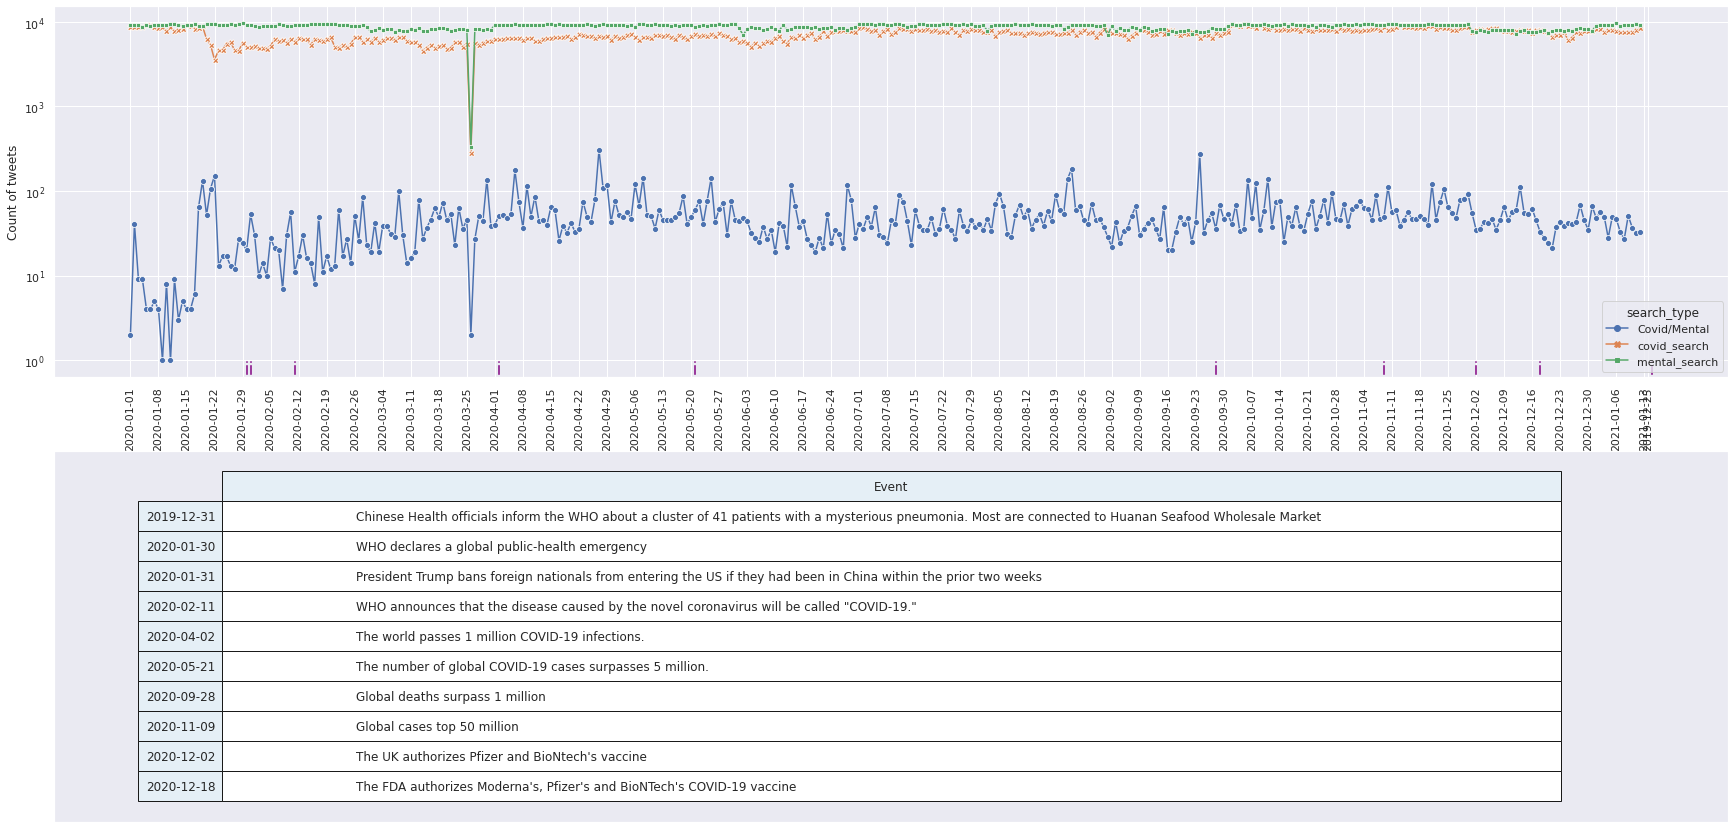

In [ ]:
# use above function widgets
import ipywidgets as widgets
import pandas as pd
from datetime import datetime
from IPython.display import display
start_date = datetime(2019, 12, 1)
end_date = datetime(2021, 2, 28)

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

#display(selection_range_slider)
widgets.interact(
    display_trend,
    selection_range_slider=selection_range_slider
);


**Observation from the graph** 

The above plots represent the count of Tweets mined that contain keywords on COVID, mental health and both. The following can be observed in the visualizations. 

*   In the graph, the orange line represents the count of COVID related Tweets. We see that there is a gradual slope in the line with increasing Tweets containing COVID keywords. In the begining, during December 2019, we see a sudden increase in Tweets with respect to COVID. This is exact time when Chinese Health officials informed the WHO about a cluster of 41 patients with a mysterious pneumonia, connected to Huanan Seafood Wholesale Market. As this was the inception of COVID, we do not see much Tweets that contain mental health terms.
*   In the graph, the blue line represents count of Tweets containing BOTH COVID and Mental health related Tweets. We see there are huge spikes.

1.   A sudden spike in the end of January, these could be related to events like 'WHO declares a global public-health emergency' and 'President Trump bans foreign nationals from entering the US if they had been in China within the prior two weeks'. These events could have increased anxiety and hence Tweets related to mental health.
2.   We also see a huge spike during May and June, this is when the COVID had reached a peak and was rapidly spreading. In May we find that 'The number of global COVID-19 cases surpasses 5 million' and in June, 'The number of global COVID-19 cases surpass 10 million, and global deaths surpass 500,000' 




##Recent 3 weeks data with Geolocation

Due to feature parity issue in twitter API, we could not filter historial tweets using geolocation using full archive access. We used standard api and tweepy to fecth 3 weeks of data from feb find out if different cities are reacting differently to covid vaccine news.  
Using the code segments that follow, each of us split the task of obtaining data for 5 cities each.

In [ ]:
# Creating lists of covid and mental health related keywords
# Source: https://www.henryford.com/blog/2020/04/covid19-key-terms-to-know
# Source: https://www.jmir.org/2020/10/e22635?utm_source=ground.news&utm_medium=referral

covid_search_term = "Asymptomatic OR Coronavirus OR (Community spread) OR Ventilator OR PPE (Social distancing) OR (Self isolation) OR (Self quarantine) OR (Shelter in place) OR mask OR N95 OR (Herd immunity) OR Vaccine OR COVID"
mental_search_term = "(mental health) OR depression OR stress OR addiction OR alcoholism OR anxiety OR (health anxiety) OR lonely OR ptsd OR schizophrenia OR (social anxiety) OR suicide OR meditation OR therapy OR counsel OR emotion"

# Creating a list of cities and theor geocodes                    

cities = [['New York',"40.730610,-73.935242,100mi"],['Seattle',"47.608013,-122.335167,100mi"],['Hawaii',"19.741755,-155.844437,100mi"],['Miami',"25.761681,-80.191788,100mi"],['London',"51.509865,-0.118092,100mi"]
          ,['Mumbai',"19.076090,72.877426,100mi"], ['Delhi',"28.644800,77.216721,100mi"],['Seoul',"37.532600,127.024612,100mi"],['Singapore',"1.290270,103.851959,100mi"], ['Tokyo',"35.652832,139.839478,100mi"]
          ,['Rome',"41.902782,12.496366,100mi"],['Auckland',"-36.848461,174.763336,100mi"],['Syndey',"-33.865143,151.209900,100mi"],['Cape Town',"-33.918861,18.423300,100mi"],['Manaus-Brazil',"-3.117034,-60.025780,100mi"]] # list of cities and their geocode


In [ ]:
# Converting cities to data frame
df_cities = pd.DataFrame(cities,columns=['CityName','Geocode'])
df_cities

CityName                      Geocode
0        New York   40.730610,-73.935242,100mi
1         Seattle  47.608013,-122.335167,100mi
2          Hawaii  19.741755,-155.844437,100mi
3           Miami   25.761681,-80.191788,100mi
4          London    51.509865,-0.118092,100mi
5          Mumbai    19.076090,72.877426,100mi
6           Delhi    28.644800,77.216721,100mi
7           Seoul   37.532600,127.024612,100mi
8       Singapore    1.290270,103.851959,100mi
9           Tokyo   35.652832,139.839478,100mi
10           Rome    41.902782,12.496366,100mi
11       Auckland  -36.848461,174.763336,100mi
12         Syndey  -33.865143,151.209900,100mi
13      Cape Town   -33.918861,18.423300,100mi
14  Manaus-Brazil   -3.117034,-60.025780,100mi

**NOTE:** The next steps for data collection were done separately using the following code for 5 cities each. After colletcing the data we resume our project with combining our respective datasets for our analysis. 

In [ ]:
# Function to read the key file and load keys in a dictionary
def loadKeys(key_file):
    with open(key_file) as f:
        key_dict = json.load(f)
    return key_dict['api_key'], key_dict['api_secret'], key_dict['token'], key_dict['token_secret']

# Setting auth and making api client
KEY_FILE = f'{PROJECT_PATH}/keys.json'
api_key, api_secret, token, token_secret = loadKeys(KEY_FILE)
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(token, token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
from datetime import datetime

# Collecting Twitter data with covid and mental health related terms and while filtering our retweets and replies and writing into CSV
covid_search_term = " OR ".join(covid_keywords)
mental_search_term = " OR ".join(mental_health_keywords)
filters = " -filter:retweets -filter:replies" #+ "since:2021-01-01" + "until:2021-01-07" # noreplies
no_of_pages = 1
def tweets_datagenerator(api, new_search, no_of_pages,city, keyword_type):
    for page in tweepy.Cursor(api.search, q = new_search, lang="en",tweet_mode='extended',geocode=city[1]).pages(no_of_pages):
      for status in page:
        # Remove new lines from tweets so that we can write it properly in CSV
        text = ' '.join(status.full_text.split('\n'))
        # Using | as delimiter for writing in csv
        yield f'{str(status.id)}|{keyword_type}|{city[0]}|{status.created_at.strftime("%m/%d/%Y")}|{status.user.location}|{text}\n'

In [ ]:
# Test code
gen = tweets_datagenerator(api,covid_search_term,1,cities[6],'hello')
for x in gen:
  print(x)

In [ ]:
%%time
SLEEP_TIME = 60*15

def fetch_tweets(tweet_generator,query,city,keyword_type):
    try:
        for x in tweet_generator:
            with open(f'{DATA_PATH}/corona_mental_health.csv','a') as writer:
                writer.write(x)
    except tweepy.TweepError:
        print('rate limit hit. Will sleep for', SLEEP_TIME)
        time.sleep(SLEEP_TIME) #sleep and make failed request again
        tweet_generator = tweets_datagenerator(api,query ,50000,city,keyword_type)
        fetch_tweets(tweet_generator,query,city,keyword_type)


In [ ]:
# Fetching tweets realted to mental health realted keywords
for city in cities[1:15]:
  print(mental_search_term, city)
  tweet_generator = tweets_datagenerator(api, mental_search_term + filters ,50000,city,'mental_keywords')
    # Calling fetch tweet function
  fetch_tweets(tweet_generator,mental_search_term + filters,city,'mental_keywords')

In [ ]:
# Displaying COVID related keywords
covid_search_term

In [ ]:
%%time
# Fetching tweets realted to COVID realted keywords

for city in cities[5:10]:
  print(covid_search_term, city)
  tweet_generator = tweets_datagenerator(api,covid_search_term + filters ,50000,city,'covid_keywords')
    # Calling fetch tweet function
  fetch_tweets(tweet_generator,covid_search_term + filters,city,'covid_keywords')

In [ ]:
# Reading CSV and finding the shape of the data
df_corona_mental = pd.read_csv(f'{DATA_PATH}/corona_mental_health.csv',sep='|',header=None,error_bad_lines=False,lineterminator='\n')
df_corona_mental.shape

In [ ]:
# Aggregating data
df_corona_mental.groupby([1,2,3]).agg('count')

## Combine 3 weeks data with geolocation

In [ ]:
# Combining data files into one dataframe
data_files = ['aftab_corona_mental_health.csv','anusha_corona_mental_health_2_20.csv','anusha_corona_mental_health.csv',
              'corona_mental_health_219.csv','sahana_corona_mental_health_20_02.csv','corona_mental_health_226.csv','Rest_corona_mental_health_226.csv']
df_data = pd.DataFrame()
for file in data_files:
  df = pd.read_csv(f'{DATA_PATH}/{file}',sep='|',header=None,error_bad_lines=False,lineterminator='\n')
  df_data = pd.concat([df_data,df])

In [ ]:
# Creating new CSV with combined data
df_data.columns = ['tweet_id','keyword_type','search_city','created_at','user_city','tweet_text']
df_data.to_csv(f'{DATA_PATH}/project_phase2_data.csv',index=None)

# Data Cleaning - Removing Duplicates



In [ ]:
# we may have got duplicate tweets as we had restart data collection process few times
df_corona_mental = pd.read_csv(f'{DATA_PATH}/project_phase2_data.csv',sep=',',error_bad_lines=False,lineterminator='\n')

After combining all the mined data sources into one single csv (project_phase2_data.csv), we need to remove the duplicate Tweets based on Tweet IDs in first column. 

In [ ]:
# Deleting duplicate rows
print("Before removing duplicates:", df_corona_mental.shape)
# removing dunplicate tweets
df_corona_mental = df_corona_mental.drop_duplicates(subset=['tweet_id','keyword_type'], keep="first")
print("After removing duplicates:", df_corona_mental.shape)
# Save tweets that we got from standard api search.
df_corona_mental.to_csv(f'{DATA_PATH}/Final_Data/final_recent_fecb21_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')

Before removing duplicates: (182738, 6)
After removing duplicates: (165507, 6)


We believe that the common tweets that were deleted were becasue of our data collection process. We collected data based on covid and mental health related terms which could lead to an overlap. However, we also believe that these are the tweets which will be the most important because they cover both aspects.

# EDA: Exploratory Data Analysis 
Here we looked into data to check if we have enough tweets for each date and also find any abnormal tweets such as very short or long tweets. 

In [ ]:
df_corona_mental = pd.read_csv(f'{DATA_PATH}/Final_Data/final_recent_fecb21_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')

In [ ]:
# we get some tweets common in both search key words..  I got 2660 common tweet
# we may see more tweets being common in both searchs 
pd.set_option('max_colwidth', 1000)
df_corona_mental.head().style.set_properties(**{'text-align': 'left'})
df_corona_mental.shape

(165507, 6)

We have collected 182k user tweets which after removal of duplicates reduced to 165k and each tweet has following attributes in dataset:  
`tweet_id` : tweet ID in twitter system. As we are collecting data in batches, this field could be used to remove duplicate and it can also be used to check same tweets appears in both corona and mental health related keyword searches.  
`keyword_type` : corona or mental. It indicates that we tweet is fecthed using which type of keywords.  
`search city` : city that is mentioned in search query.   
`created_dt`:  tweet created date from twitter.  
`user_city` : city from user profile.  
`tweet_text` : full text for user tweets. 

### Q1. How is data distribution by city ?

The data was mined specifically for 15 metropolitan cities across globe. These cities represent diverse population and political spectrum. They also differ in severity of impact. The citites selected are:

These cities include 'New York', 'Seattle', 'Hawaii', 'Miami', 'London', 'Mumbai', 'Delhi', 'Seoul', 'Singapore', 'Tokyo', 'Rome', 'Auckland', 'Syndey', 'Cape Town', 'Manaus-Brazil'

These cities located across the globe are experiencing diverse waves of COVID. Hence, there are varied Tweet responses with respect to Tweets containing words related to mental health. 

Below is a bar chart representing the number of Tweets per cities. The visualization shows that there are more number of Tweets from London and New York than compared to other cities like Auckland, Singapore and Tokyo. This may be due to the new COVID virus strain cases that originated from London and higher Covid cases in New York.



<BarContainer object of 15 artists>

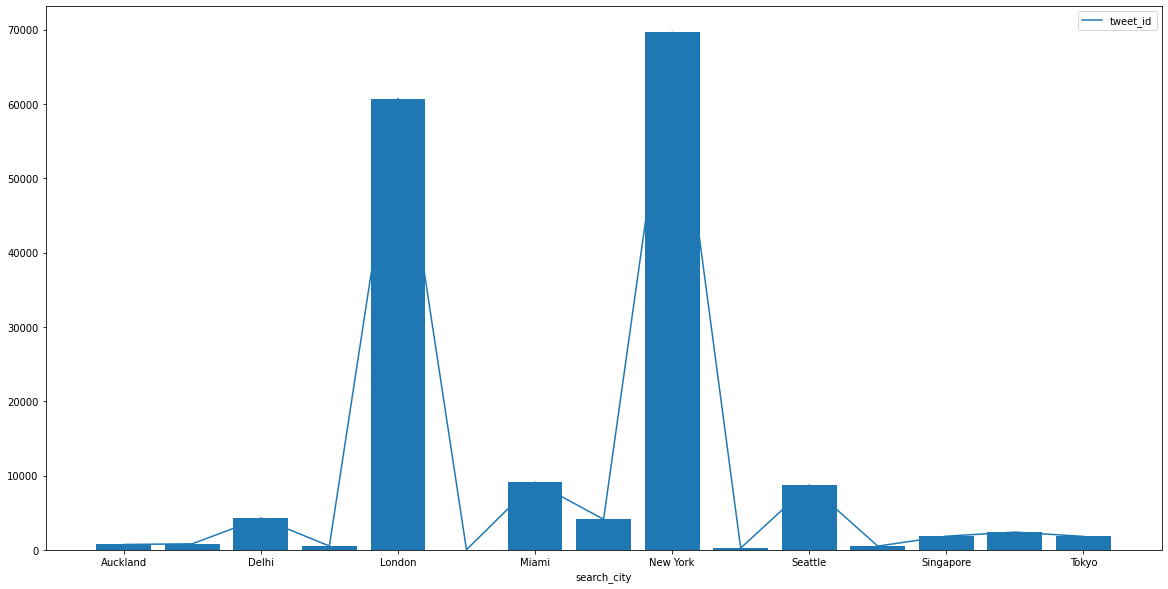

In [ ]:
## Q1 How is data distribution by city.
# we need to find out if we have good representation of cities in our data. if not,we need to go back and get more data if possible

df_cities = df_corona_mental[['search_city','tweet_id']].groupby(['search_city']).count()
df_cities.plot(figsize=(20,10))
plt.bar(df_cities.index, df_cities['tweet_id'])

### Q2. How is the Tweet distribution by the date?

The data collected from three weeks is aggregated based on dates. The bar chart represents varing counts of Tweets collected for each date. From the visualization we see that, 11th Feb have higher Tweets with the keywords searched for.

<BarContainer object of 26 artists>

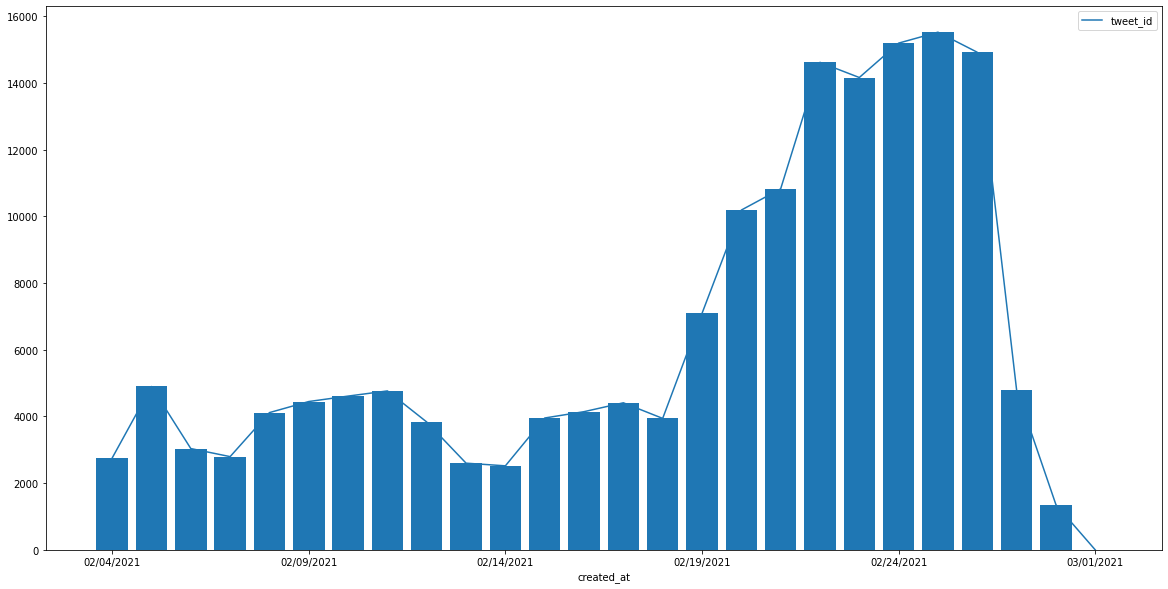

In [ ]:

# we need to find out if we have good representation of cities in our data. if not,we need to go back and get more data if possible

df_cities = df_corona_mental[['created_at','tweet_id']].groupby(['created_at']).count()
df_cities.plot(figsize=(20,10))
plt.bar(df_cities.index, df_cities['tweet_id'])

### Q3. How is the distribution of Tweet length?

Twitter post text characters can be limited. The Tweets need to be readable and engaging. To understand the text length of Tweets related to COVID and mental health, we have aggregated the word counts by searched cities, to find out minimum, maximum and mean of the count of words.

In [ ]:
# Function to split tweets into words
def text_word_count(row):
  word_count = 0
  text = row.tweet_text
  try:
    word_count = len(text.split(' '))
  except: 
    word_count = 0
  return word_count

df_corona_mental.loc[:,'word_count'] = df_corona_mental.apply(text_word_count,axis=1)


In [ ]:
# Calculting aggregates
df_corona_mental[['search_city','word_count']].groupby('search_city').agg(['min','mean','max'])

word_count                 
                     min       mean   max
search_city                              
Auckland               4  26.615385    55
Cape Town              5  26.275000    56
Delhi                  2  24.895508   501
Hawaii                 6  26.730159    61
London                 2  30.955987  2155
Manaus-Brazil          6   6.000000     6
Miami                  0  24.731177    60
Mumbai                 2  26.996190    84
New York               2  26.634598  1182
Rome                   6  24.075000    57
Seattle                3  28.599412   280
Seoul                  3  25.051282    56
Singapore              3  24.827094    58
Syndey                 5  26.314714   432
Tokyo                  2  25.179245    57

The results show that some data is likely to be problematic. We can see tweets with as low as 0 words in them and as high as 2155 words. These are likely to be problematic to our analysis and need to be looked into further. For this reason we will conduct another round of data cleaning.

# Data Cleaning - Cleaning Tweet Text 
In tweet clean up, we removed URL, user mentioned, digits, whitespaces and RT/rt. We have also converted tweets to lowercase. We have also used nltk TweetTokenizer tokenize tweets and join the tweets again after removing stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
# Removing stop words
stop_Words = set(stopwords.words('english'))
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [ ]:
import re, string

# Cleaning Tweet text
def textcleaner(row):

    text= row.tweet_text
    text = str(text)
    text = text.lower()
    #remove urls
    text  = re.sub(r'http\S+', '', text)
    #remove mentions
    text = re.sub(r"(?<![@\w])@(\w{1,25})", '', text)
    #remove hashtags
    text = re.sub(r"(?<![#\w])#(\w{1,25})", '',text)
    #remove other special characters
    text = re.sub('[^A-Za-z -]+', '', text)
    #remove digits
    text = re.sub('\d+', '', text)
    # Stripping excess spaces
    text = text.strip(" ")
    text = re.sub('\s+', ' ', text)
    #text = re.sub('\[.*?\]', '', text)
    # remove RT symbol
    text = re.sub('^RT\s+|^rt\s','', text)
    text = ' '.join([token for token in tknzr.tokenize(text) if token not in stop_words])
    return text


In [ ]:
%%time
df_corona_mental.loc[:,'cleaned_tweet_text'] = df_corona_mental.apply(textcleaner,1)

CPU times: user 18.7 s, sys: 89.3 ms, total: 18.8 s
Wall time: 18.8 s


In [ ]:
# Checking lenght of updated text
pd.set_option('max_colwidth', 1000)
df_corona_mental[['cleaned_tweet_text']].head().style.set_properties(**{'text-align': 'left'})


We can see that the frequency of words like covid, coronavirus, mental health and vaccine are very high, which shows that these are the topics people are mostly talking about. 

In [ ]:
 # Creating new dataset with cleaned tweet data
 cleaned_cornona_mental = df_corona_mental.drop('tweet_text', axis=1)
 cleaned_cornona_mental.head()

tweet_id  ...                                                                                                                                                                                                 cleaned_tweet_text
0  1.360099e+18  ...                                                                                                                         ive been slowly poisoning my mental health with flashes of goodness and hilarity for years
1  1.360098e+18  ...                                               call if you are hurting a vet need to talk suicide mental health number vets can also google n call the va no judgment guys dm me if you want lets talk stay with us
2  1.360098e+18  ...  going to take a little break from social media its just around this time of year that really effects my mental health and well being i will be back soon but for now my attendance on the internet will be spotty
3  1.360097e+18  ...                                                                                                                 new love story is great and when new fearless drops im taking a week off work for my mental health
4  1.360097e+18  ...                                                       was star trek tng really onto something with deanna trois counselor role and mental health for the crew or do most folks think that was a patronizing device

[5 rows x 6 columns]

In [ ]:
cleaned_cornona_mental.to_csv(f'{DATA_PATH}/Final_Data/recent_weeks_clean_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')

# Clean and save historical data
Using above `textcleaner` method we processed all historical tweets and save it shared drive

In [ ]:
 # Creating new dataset with cleaned tweet data
 df_common.loc[:,'cleaned_tweet_text'] = df_common.apply(textcleaner,1)
 df_common = df_common.drop('tweet_text', axis=1)
 df_common[['cleaned_tweet_text']].tail().style.set_properties(**{'text-align': 'left'})
 df_common.to_csv(f'{DATA_PATH}/Final_Data/historical_common_clean_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')

In [ ]:
df_common

tweet_id  ...                                 cleaned_tweet_text
0      1201651848979062785  ...  a new could revolutionize cancer therapy it er...
1      1201651451149377536  ...  yes - yes of course our bond would be unbroken...
2      1202014340754399232  ...  bath bomb or a nice hot shower with a relaxing...
3      1202014325847855104  ...  elon musk said neuralink brain chips could sol...
4      1202014173196169216  ...  lonely in my hotel room in belfast another sho...
...                    ...  ...                                                ...
21091  1344793116671422466  ...  just a few names from the top of my head kobe ...
21092  1344793113995452416  ...  are dead and you talk about freedom having to ...
21093  1344793080617005056  ...  doom on his mask cant stress how influential t...
21094  1344793035863949312  ...  i feel like everyone is getting covid and im j...
21095  1344793015714512897  ...  i got the covid vaccine today after months of ...

[21096 rows x 14 columns]

In [ ]:
 # Creating new dataset with cleaned tweet data
 df_covid.loc[:,'cleaned_tweet_text'] = df_covid.apply(textcleaner,1)
 #df_covid = df_covid.drop('tweet_text', axis=1)
 df_covid[['cleaned_tweet_text']].head().style.set_properties(**{'text-align': 'left'})
 #df_covid.to_csv(f'{DATA_PATH}/Final_Data/historical_covid_clean_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')

In [ ]:
 # Creating new dataset with cleaned tweet data
 df_mental.loc[:,'cleaned_tweet_text'] = df_mental.apply(textcleaner,1)
 df_mental = df_mental.drop('tweet_text', axis=1)
 df_mental[['cleaned_tweet_text']].head().style.set_properties(**{'text-align': 'left'})
 #df_mental.to_csv(f'{DATA_PATH}/Final_Data/historical_mental_clean_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')

# Preliminary Data Analysis

The following is the initial analysis on a small dataset to offer evidence that we have quality tweet data to find answer to research questions

## Word cloud for historical data

Using world cloud to find out various topic being dicussed in tweets.

In [ ]:
# Reading all data files
df_covid_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_covid_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_mental_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_common_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_common_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')

In [ ]:
# Word cloud for covid terms
df_covid_cleaned['cleaned_tweet_text'] = df_covid_cleaned['cleaned_tweet_text'].astype(str)
df_mental_cleaned['cleaned_tweet_text'] = df_mental_cleaned['cleaned_tweet_text'].astype(str)
df_common_cleaned['cleaned_tweet_text'] = df_common_cleaned['cleaned_tweet_text'].astype(str)


In [ ]:
# Word cloud for covid terms
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([token for token in df_covid_cleaned.cleaned_tweet_text.tolist()]))


In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Word cloud for mental health terms
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([token for token in df_mental_cleaned.cleaned_tweet_text.tolist()]))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

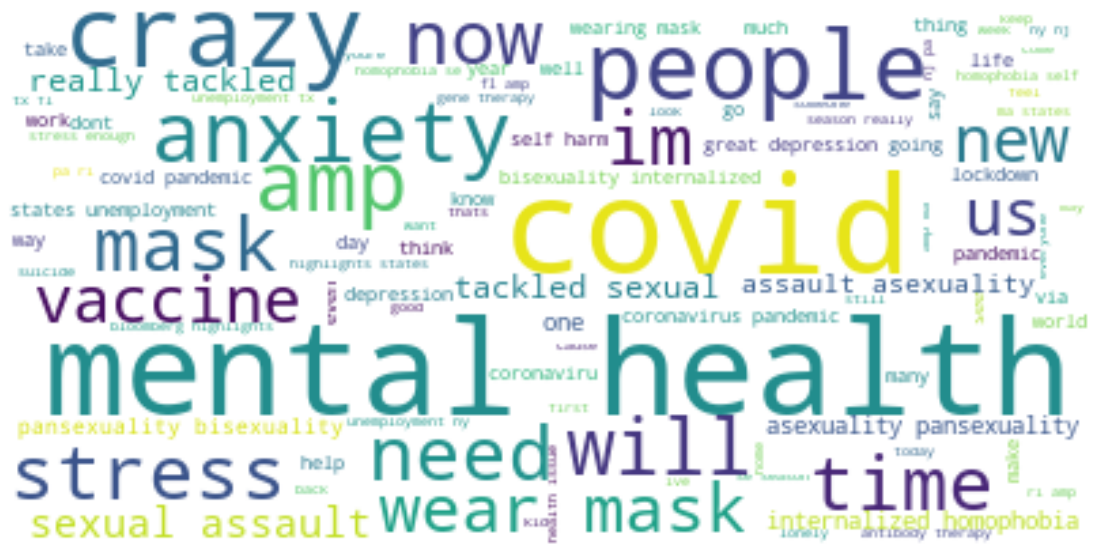

In [ ]:
# Word cloud for common 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([token for token in df_common_cleaned.cleaned_tweet_text.tolist()]))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We can see several words such as masks, anxiety, vaccine, covid show up that is proof that our results make sense.

The word clouds for the Mental and Covid data were not executable becasue of the size of the datasets. In the next phase we plan to create an interactive graph to see the changes in topics for each month.

### What are the most popular words in the Tweets?

The Tweets have been searched and filtered based on the Covid and mental health keywords. Below is a word cloud of unique words in tweets from different cities 

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

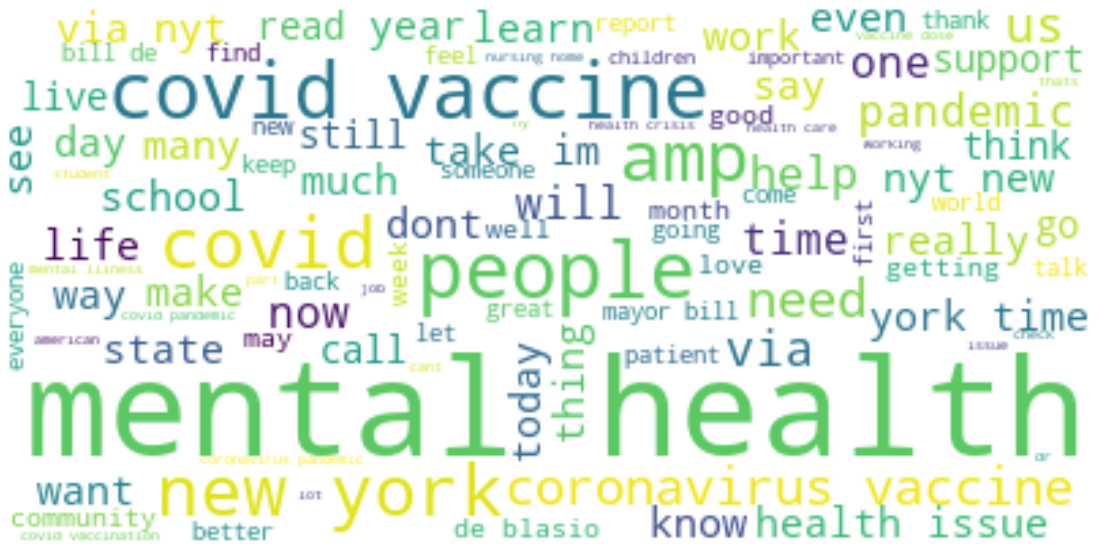

In [ ]:
# word cloud by cities to check if some keywords are more popular in certain cities

# Word cloud for Newyork
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([token for token in cleaned_cornona_mental[cleaned_cornona_mental['search_city'] =='New York'].cleaned_tweet_text.tolist()]))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

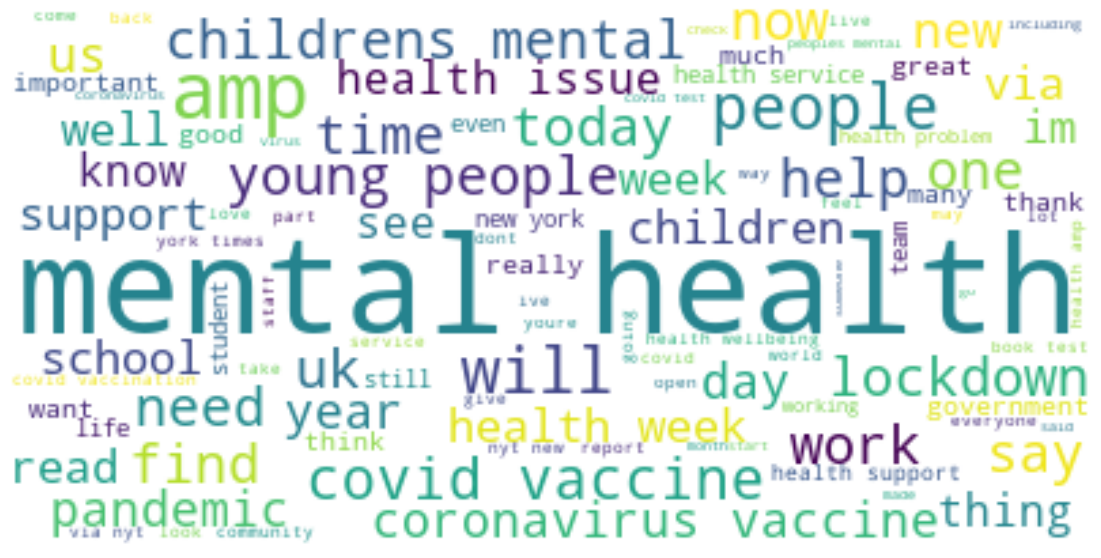

In [ ]:
# Word cloud for London
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([token for token in cleaned_cornona_mental[cleaned_cornona_mental['search_city'] =='London'].cleaned_tweet_text.tolist()]))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

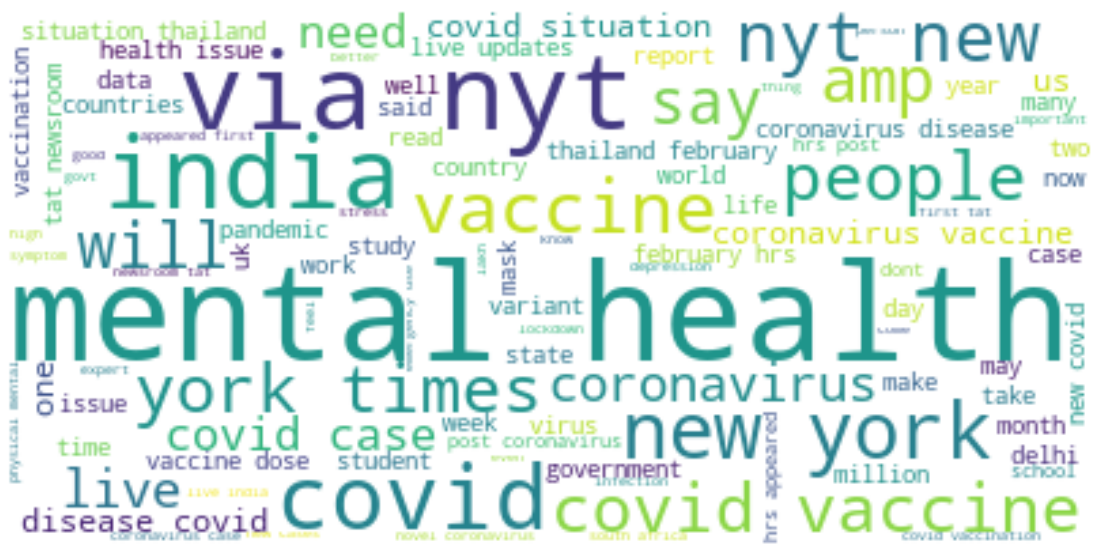

In [ ]:
# Word cloud for Delhi
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([token for token in cleaned_cornona_mental[cleaned_cornona_mental['search_city'] =='Delhi'].cleaned_tweet_text.tolist()]))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We can notice in the above word clouds that people are mostly talking about mental health and the covid vaccine. This could be attributed to the major event of the distribution of vaccines worldwide.

We can also see words like lockdown, uk and thailand which could all be associated with the new strain of the virus that has affected several areas. 

### How are sentiments across the data?


The trend in the sentiments of the data collected can help us explain the various COVID events and validate their impact on the people.

In [ ]:
# install vader annd huggingface transformer
!pip install vaderSentiment
!pip install transformers

#### Sentiment for historical data

Here we explored 3 different sentiment analysis methods:


1.   **VADER Sentiment Analysis**. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
2.   **TextBlob** is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
3.  **HuggingFace Transformers** library by implementing a Sentiment Analysis Pipeline. 



In [ ]:
%%time
# Reading all data files
df_covid_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_covid_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_mental_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_common_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_common_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_cleaned_all = pd.concat([df_covid_cleaned,df_mental_cleaned,df_common_cleaned])

CPU times: user 30.8 s, sys: 3.83 s, total: 34.7 s
Wall time: 45.9 s


In [ ]:
df_cleaned_all.head()

tweet_id  ...                                 cleaned_tweet_text
0  1201289872301948929  ...  if we were to wake up tomorrow and socialism w...
1  1201289847475974144  ...  recreate the thrill of watching the irishman b...
2  1201289836528713728  ...  practice self care and put on your own oxygen ...
3  1201289819415965696  ...  twilight princess link between worlds majoras ...
4  1201289816756957184  ...  usa today bestselling author investigating vac...

[5 rows x 14 columns]

In [ ]:
# df_cleaned_all.loc[:,'month'] = df_cleaned_all.apply(extract_month,1)
# df_cleaned_all.loc[:,'day'] = df_cleaned_all.apply(day_of_month,1)


In [ ]:
%%time
df_cleaned_all.dropna(subset=['cleaned_tweet_text'],inplace=True)

CPU times: user 2.7 s, sys: 3.99 s, total: 6.68 s
Wall time: 13.9 s


**Using VADER**

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def vader_sentiment(row,rtype='both'):
    if isinstance(row, pd.Series):
      text = row.cleaned_tweet_text
    else:
      text = row
    # process tweets
    test_tweet = row.cleaned_tweet_text
    #get polarity score
    scores = analyzer.polarity_scores(test_tweet)
    # define rules using compond score
    compound_score = scores['compound']
    sentiment = 0
    if compound_score >= .05:
        sentiment = 1
    if compound_score <= -.05:
        sentiment = -1
    if rtype == 'score':
      return compound_score
    if rtype =='sentiment':
      return sentiment
    return sentiment,compound_score 


**Using Hugging Face transformers**

In [ ]:
#https://huggingface.co/transformers/task_summary.html#sequence-classification
#https://colab.research.google.com/github/huggingface/notebooks/blob/master/transformers_doc/pytorch/task_summary.ipynb
from transformers import pipeline
hf_nlp = pipeline("sentiment-analysis")
hf_nlp("I hate you")[0]

{'label': 'NEGATIVE', 'score': 0.9991129040718079}

In [ ]:

def hg_transformers_sentiment(row):
  if isinstance(row, pd.Series):
    text = row.cleaned_tweet_text
  else:
    text = row
  result = hf_nlp(text)[0]
  sentiment = 0
  if result['score'] >= 0.55:
      sentiment = 1 if result['label'] == 'POSITIVE' else -1
  return sentiment, sentiment* result['score'] # change sign of score if sentiment is negative


**Using TextBlob**

In [ ]:
from textblob import TextBlob
def textblob_sentiment(row):
  if isinstance(row, pd.Series):
    text = row.cleaned_tweet_text
  else:
    text = row
  testimonial = TextBlob(text)
  sentiments = testimonial.sentiment
  polarity = sentiments.polarity
  subjectivity = sentiments.subjectivity
  if .95 < subjectivity: # score if very subjective, mark it as neutral
    sentiment = 0
  else:
    if polarity < 0: 
      sentiment = -1  
    elif polarity > 0:
      sentiment = 1 
    else: sentiment = 0
  return sentiment , polarity

In [ ]:
#test code
hg_transformers_sentiment("I love to hurt you")

(-1, -0.9914084076881409)

**Combining sentiments collected from different methods**

In [ ]:
%%time
#test code with 10 records
df = df_cleaned_all.sample(25,random_state=123)
df1 = df.apply(vader_sentiment,1,args=('both',),result_type ='expand')
df1.columns= ['vader_sentiment','vader_score']
df2 = df.apply(hg_transformers_sentiment,1,result_type ='expand')
df2.columns= ['hf_sentiment','hf_score']
df3 = df.apply(textblob_sentiment,1,result_type ='expand')
df3.columns= ['tb_sentiment','tb_score']
df = pd.concat([df,df1,df2,df3],axis=1)


CPU times: user 2.67 s, sys: 18.9 ms, total: 2.69 s
Wall time: 1.55 s


In [ ]:
df[['cleaned_tweet_text','vader_sentiment','vader_score','hf_sentiment','hf_score','tb_sentiment','tb_score']].style.set_properties(**{'text-align': 'left'}).head()

It is hard to choose which sentiment classfier is better for finding correct sentiment of tweets as we do not have ground truth to test each of classifer. Hence we have opted for manually looking into 25 tweets and see how each of classifier performs specifically in cases where they diff.
For example:
- "today the president tweeted my blood is the vaccine narrator and with that the year-old american experiment was" is classified as negative by transformer based classifier. It is pretty neutral tweet and vader and textblob were able to capture this results correctly.
- "	whatever is hurting you tonight whatever stress whatever pain whatever frustration or relationship issues i pray it b" is negative and vader and transformer based classifer are able to capture this sentiment where as textblob based classifered marked this as neural(polarity zero)
- "you want your kids back in school wear a mask you want an nfl season wear a mask you want college sports wear a mask you" is classified as negative by transformer and neutral by textblob. However vader classified it as positive. This tweet is trying to incourage people to wear mask so seems slighly positive.

As we can see from these examples, VADER classifers works better in most cases, so we would choose VADER classifer for further analysis.

**Note** : we should have done accuracy and F1-score comparision to select better classifer provided we had manually labeled data as groundtruth.
Also, we can see there tweets that are not related to corona virus or mental health in dataset as well. We would need to finetune keywords that we used for search via twitter API.

In [ ]:
%%time
df_cleaned_all.loc[:,'vader_score'] = df_cleaned_all.apply(vader_sentiment,1,args=('score',))
df_cleaned_all.loc[:,'vader_sentiment'] = df_cleaned_all.apply(vader_sentiment,1,args=('sentiment',))


CPU times: user 38min 54s, sys: 13.5 s, total: 39min 7s
Wall time: 39min 9s


In [ ]:
# save clean tweets to drive for further processing
#df_cleaned_all.to_csv(f'{DATA_PATH}/Final_Data/historical_clean_sentiment_tweets.csv',sep='|',header=True,index=False,line_terminator='\n')


**Saving the cleaned data**

In [ ]:
#LOAD AND START FROM HERE
df_cleaned_all = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_clean_sentiment_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_cleaned_all.head(4)

tweet_id                created_at  ...  vader_score vader_sentiment
0  1201289872301948929  2019-12-01T23:59:59.000Z  ...      -0.4019              -1
1  1201289847475974144  2019-12-01T23:59:53.000Z  ...       0.3612               1
2  1201289836528713728  2019-12-01T23:59:50.000Z  ...       0.1461               1
3  1201289819415965696  2019-12-01T23:59:46.000Z  ...       0.0000               0

[4 rows x 16 columns]

In [ ]:

df_sentiment_trend = df_cleaned_all[['vader_score','search_type','date']].groupby(['search_type','date']).mean().reset_index()
df_sentiment_trend.tail()

search_type        date  vader_score
1275  mental_search  2021-02-23    -0.127473
1276  mental_search  2021-02-24    -0.076056
1277  mental_search  2021-02-25    -0.134669
1278  mental_search  2021-02-26    -0.114653
1279  mental_search  2021-02-27    -0.083022

In [ ]:
df_sentiment_count = df_cleaned_all[['vader_sentiment','search_type','date','tweet_id']].groupby(['vader_sentiment','search_type','date']).count().reset_index()
df_sentiment_count.tail()

vader_sentiment    search_type        date  tweet_id
3789                1  mental_search  2021-02-23      3087
3790                1  mental_search  2021-02-24      3239
3791                1  mental_search  2021-02-25      3007
3792                1  mental_search  2021-02-26      3065
3793                1  mental_search  2021-02-27      3293

Visualize sentiments (positive, negative and neutral) trend

In [ ]:
import seaborn as sns
def sentiment_trend(selection_range_slider):
  startdate=selection_range_slider[0].strftime("%Y-%m-%d")
  enddate = selection_range_slider[1].strftime("%Y-%m-%d")

  d1 = datetime.strptime(startdate,"%Y-%m-%d") #date(2019,12,1)
  d2 = datetime.strptime(enddate,"%Y-%m-%d") #date(2021,3,1)
  # this will give you a list containing all of the dates
  dd = [(d1 + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((d2-d1).days + 1,0,-7)]
  trend_data = df_sentiment_count[(df_sentiment_count.date>=startdate)&(df_sentiment_count.date <=enddate)]
  events = df_events[(df_events.index >= startdate)&(df_events.index <= enddate)]
  g = sns.FacetGrid(trend_data, row="search_type",height=3.5, aspect=6,margin_titles=True, despine=False,sharey=False,hue="vader_sentiment")
  g.map_dataframe(sns.lineplot, x="date", y="tweet_id")
  for x in events.index.to_list():
    plt.axvline(x=x,ymin=0,ymax = 100,color='purple',linestyle='dashdot')
  g.set_axis_labels("Date", "count of tweets")
  g.set_xticklabels(rotation=90)
  g.set_titles("Postive, Negative and Neutral tweets count by day")
  g.add_legend()

# Number of positive, negative and neutral tweets 

In [ ]:
import ipywidgets as widgets
import pandas as pd
from datetime import datetime
from IPython.display import display
start_date = datetime(2019, 12, 1)
end_date = datetime(2021, 1, 28)

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

#display(selection_range_slider)
widgets.interact(
    sentiment_trend,
    selection_range_slider=selection_range_slider
);


interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 424), layout=Layout(width='500px'), …

In [ ]:
import seaborn as sns
from datetime import datetime
from datetime import date, timedelta
import ipywidgets as widgets

def display_polarity(selection_range_slider):
  startdate=selection_range_slider[0].strftime("%Y-%m-%d")
  enddate = selection_range_slider[1].strftime("%Y-%m-%d")

  d1 = datetime.strptime(startdate,"%Y-%m-%d") #date(2019,12,1)
  d2 = datetime.strptime(enddate,"%Y-%m-%d") #date(2021,3,1)
  # this will give you a list containing all of the dates
  dd = [(d1 + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((d2-d1).days + 1,0,-7)]
  trend_data = df_sentiment_trend[(df_sentiment_trend.date>=startdate)&(df_sentiment_trend.date <=enddate)]
  events = df_events[(df_events.index >= startdate)&(df_events.index <= enddate)]
  sns.set_theme(style="darkgrid")
  fig, (ax1,ax2) = plt.subplots(2,1,figsize=(30,15))

  sns.lineplot(x="date", y="vader_score",
              hue="search_type", style="search_type",markers=True, dashes=False,ax = ax1,
              data=trend_data)
  z= ax1.set_xticks(dd)
  z = ax1.set_xticklabels(dd,rotation=90)
  z = ax1.set_ylabel("tweet's sentiment")
  # multiple lines all full height
  ax1.vlines(x=events.index.to_list(),ymin=-1,ymax = 1,label=events.event.to_list(),colors='purple',linestyles='dashdot')
  rcolors = plt.cm.BuPu(np.full(len(events.index), 0.1))
  ccolors = plt.cm.BuPu(np.full(len(events.columns), 0.1))
  the_table = ax2.table(cellText = events.values,cellLoc='left',rowLabels=events.index,colLabels=['Event'],loc='center',rowColours=rcolors,colColours=ccolors)
  the_table.scale(.8, 2.5)
  ax2.xaxis.set_visible(False) 
  ax2.yaxis.set_visible(False)


# Tweets Sentiment/Polarity

In [ ]:
import ipywidgets as widgets
import pandas as pd
from datetime import datetime
from IPython.display import display
start_date = datetime(2019, 12, 1)
end_date = datetime(2021, 1, 28)

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider( 
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

#display(selection_range_slider)
widgets.interact(
    display_polarity,
    selection_range_slider=selection_range_slider
);


interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 424), layout=Layout(width='500px'), …

**Observation**
* We see a trend in the sentiment polarity over time. In the begining December 2019, the sentiments are positive. This shows how the Tweets with respect to COVID were not very negative in sentiment in its initiation period. December 2019 was the time when Chinese Health officials inform the WHO about COVID.  
* As the time goes by the the sentiment is majorly negative. This shows the COVID rising period, which include events such as:

1. January 30, 2020 - WHO declares a global public-health emergency

2. April 2, 2020 - The world passes 1 million COVID-19 infections.

3. May 21, 2020 - The number of global COVID-19 cases surpasses 5 million.

* There is some positive sentiment seen around the Christmas and New Year period. This was when people started moving around as the lockdown was less severe. This period  also has the news about COID vaccine, such as:
1. December 2, 2020 - The UK authorizes Pfizer and BioNtech's vaccine

**Observation**
* The sentiment has generally been negative with respect to the Tweets that contain mental health keywords.
* We see a trend in the sentiment polarity over time. In the begining December 2019, the sentiments are positive. This shows how the Tweets with respect to COVID and mental health were not very negative in sentiment in its initiation period. December 2019 was the time when Chinese Health officials inform the WHO about COVID.  
* As the time goes by the the sentiment of the Tweets addressing mental health and COVID is majorly negative. The trend followed is very similar to the sentiemnts around COVID.
* There is some positive sentiment seen around the Christmas and begining of the 2021 New Year  period. This was when people started moving around as the lockdown was less severe. This period  also has the news about COID vaccine. The mental health keywords found may be due to apprehension towards the COVID vaccine and misinformation on death of people who have been administered the vaccine.

#### Sentiment for 3 weeks data 
Using three weeks data, we have tried to find if tweet sentiment is different in different cities. It would provide us insights regarding how different cities take positive development regarding pandeminc - avaibility of vaccine and various country started doing vaccination.

Here, we are performing similar sentiment analysis to understand the sentiment across the data collected for 3 weeks. This data also contains users city information which helps us analyze the data collected based on geographical location.

In [ ]:
# Using VADER to find tweet sentiment
df_corona_mental = pd.read_csv(f'{DATA_PATH}/Final_Data/recent_weeks_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_corona_mental.dropna(subset=['cleaned_tweet_text'],inplace=True)
# Adding VADER compund polarity to the dataset
df_vader_results = df_corona_mental.apply(vader_sentiment,1,result_type ='expand')
df_vader_results.columns= ['vader_sentiment','vader_score']
df_corona_mental = pd.concat([df_corona_mental,df_vader_results],1)

In [ ]:
df_corona_mental.head(5)

tweet_id  ... vader_polarity
0  1.360099e+18  ...        -0.2023
1  1.360098e+18  ...        -0.8316
2  1.360098e+18  ...         0.1406
3  1.360097e+18  ...         0.9042
4  1.360097e+18  ...         0.0000

[5 rows x 7 columns]

In [ ]:
# Grouping by city to find the avergae polarity of the tweet sentiment on a given date
# Source: https://stackoverflow.com/questions/42021665/pandas-groupby-two-columns-and-summarize-by-mean

avg_polarity_by_city = df_corona_mental.groupby(['search_city', 'created_at','keyword_type'])['vader_score'].mean().reset_index()
avg_polarity_by_city.head()

search_city  created_at     keyword_type  vader_polarity
0    Auckland  02/13/2021  mental_keywords        0.381000
1    Auckland  02/14/2021  mental_keywords        0.452200
2    Auckland  02/15/2021   covid_keywords       -0.220237
3    Auckland  02/15/2021  mental_keywords       -0.237357
4    Auckland  02/16/2021   covid_keywords       -0.057820

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

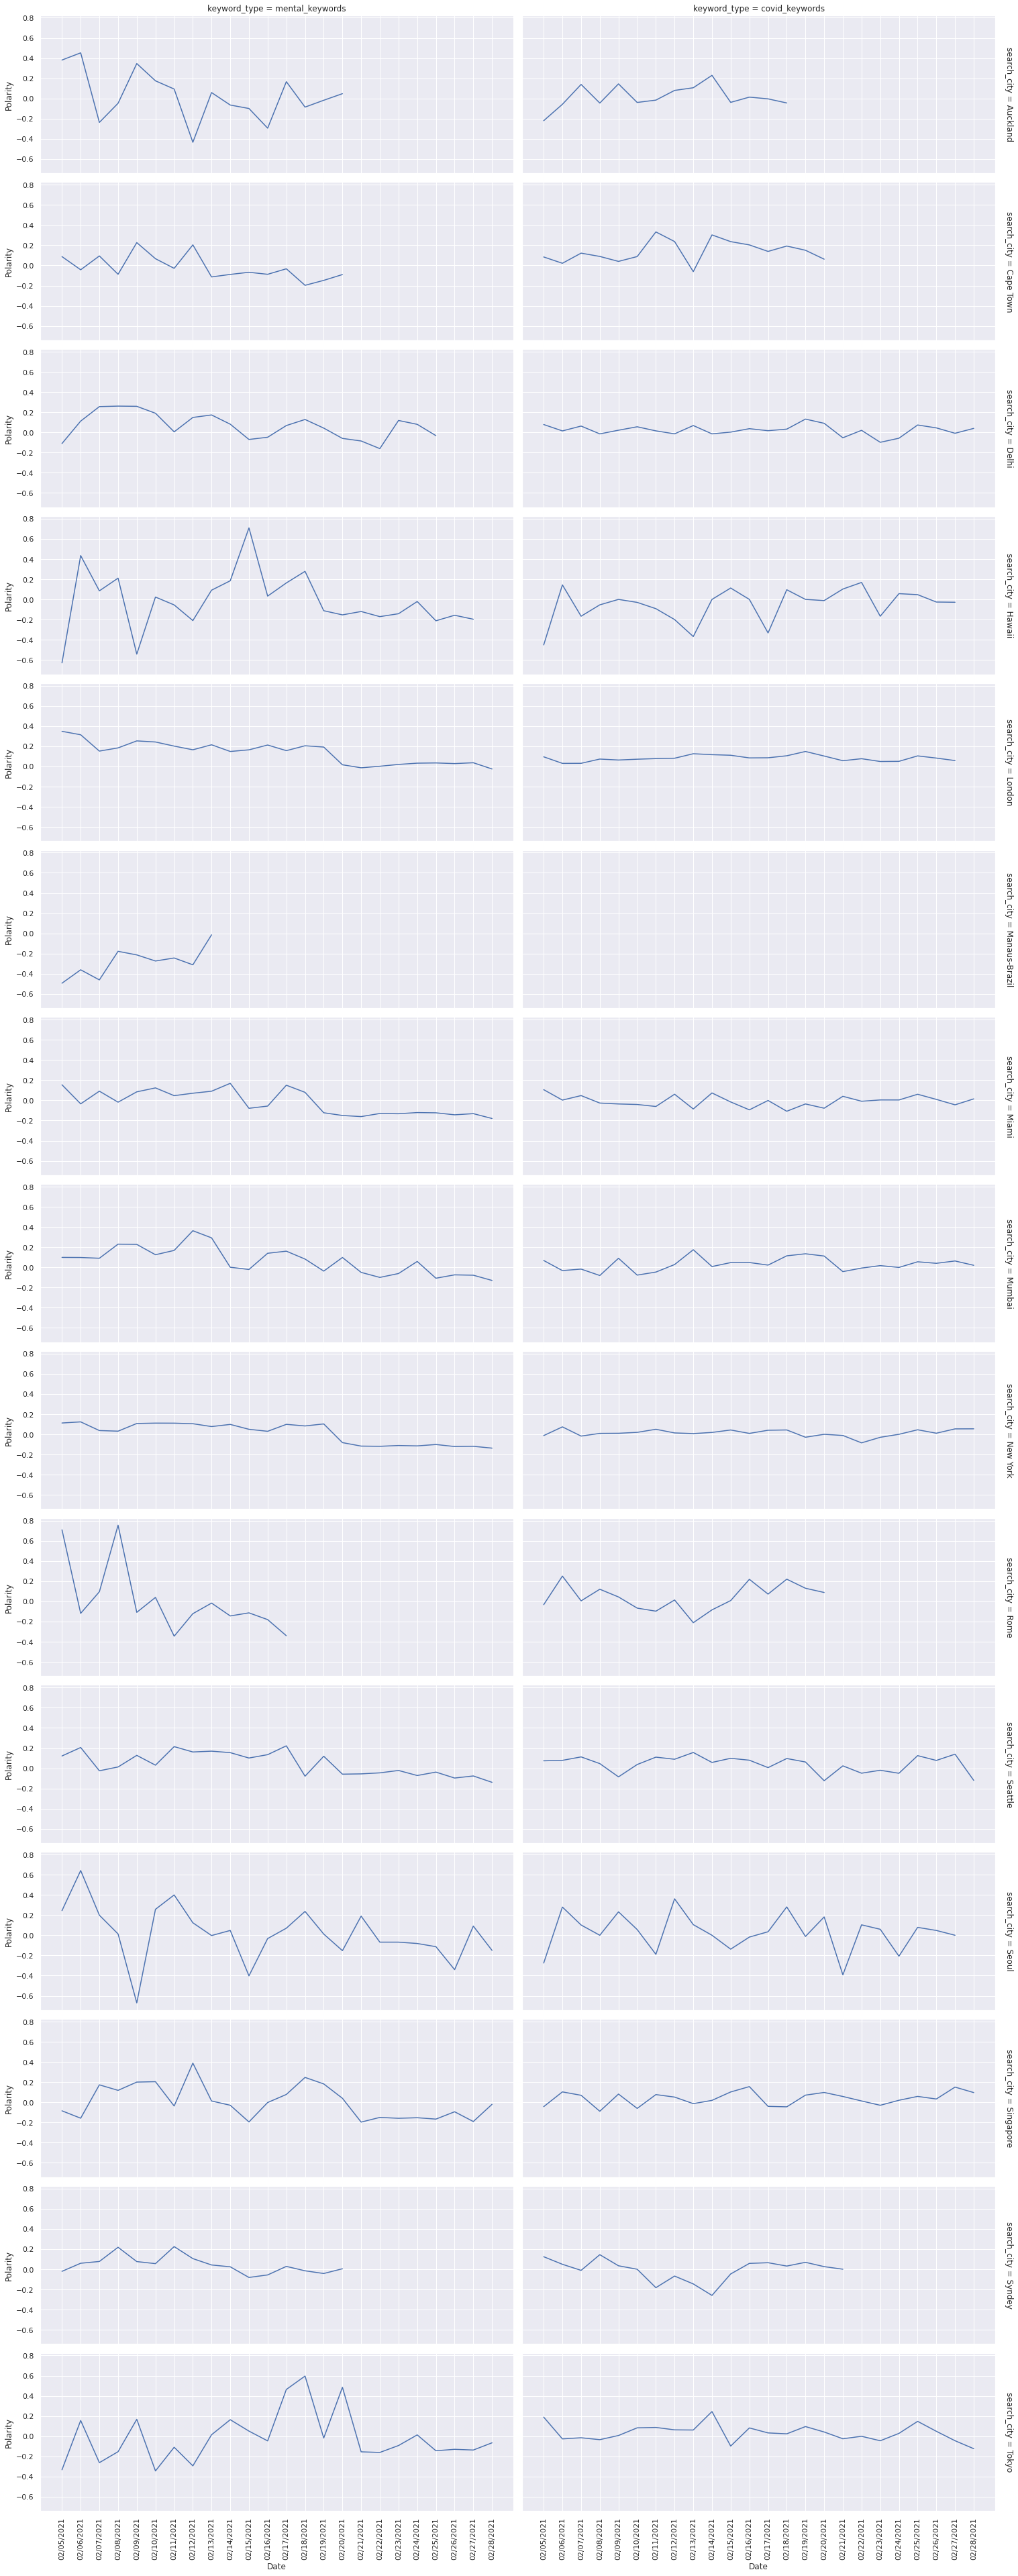

In [ ]:
# PLotting the polarity of the sentiment to visually analyse the change in sentiment over time
# Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

import matplotlib.pyplot as plt
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)
sns.set(rc={'figure.figsize':(10,20)})
#sns.set_titles("Different in tweets sentiments by City")
g = sns.FacetGrid(avg_polarity_by_city, row="search_city",col='keyword_type',height=3.5, aspect=3,margin_titles=True, despine=False)
g.map_dataframe(sns.lineplot, x="created_at", y="vader_score")
g.set_axis_labels("Date", "Polarity")
g.set_xticklabels(rotation=90)

#g.map_dataframe(annotate)

There are a couple of findings depending on the city. Cities like Auckland and Hawaii do not really show an identifyable trend. Delhi and NewYork show that the sentiment has not varied much over the two weeks and is nutral on average. However, we can see the negative trend in the sentiment for Miami and Seattle. We do not have much data for Manaus-Brazil however we can see a very enagtive tweet there.

In this plot we have shown the change in polarity for each of the cities over the the course of 2 weeks.

# Topic Modeling

Topic Modeling is method of building statistical language models used for uncovering hidden structure in a collection of texts. This also involves Dimensionality Reduction, 
Unsupervised clustering of words. By doing topic modeling, we build clusters of words rather than clusters of texts. 

In [ ]:
# Reading all data files
df_covid_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_covid_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')
df_mental_cleaned = pd.read_csv(f'{DATA_PATH}/Final_Data/historical_mental_clean_tweets.csv',sep='|',header=0,error_bad_lines=False,lineterminator='\n')


In [ ]:
df_cleaned_all = pd.concat([df_covid_cleaned,df_mental_cleaned])
df_cleaned_all = df_cleaned_all.drop_duplicates(subset=['tweet_id','date', 'cleaned_tweet_text' ], keep="first")
df_topic = df_cleaned_all[['date', 'cleaned_tweet_text']]


df_topic.head()

date                                 cleaned_tweet_text
0  2019-12-01  if we were to wake up tomorrow and socialism w...
1  2019-12-01  recreate the thrill of watching the irishman b...
2  2019-12-01  practice self care and put on your own oxygen ...
3  2019-12-01  twilight princess link between worlds majoras ...
4  2019-12-01  usa today bestselling author investigating vac...

**Dividing the dataframe based on events on the timeline into topics**

The topic dataframes are created based on major events such as :
 
* df_topic_1 and df_topic_2 represent the COVID initiation phase, before and after
declaring public-health emergency respectively
 
* df_topic_3 and df_topic_4 represent the peak phases before and after it reaches 1 million cases
 
* df_topic_5 and df_topic_6 represent the time before and after UK authorizes COVID vaccines. The df_topic_6 time period also includes the time when the lock down rules were made less severe due to ThanksGiving, Christmas and New Year. 

In [ ]:
df_topic_1 = df_topic[(df_topic['date'] >= '2020-01-15') & (df_topic['date'] < '2020-01-31')]
df_topic_2 = df_topic[(df_topic['date'] >= '2020-01-31') & (df_topic['date'] < '2020-02-15')]
df_topic_3 = df_topic[(df_topic['date'] >= '2020-03-19') & (df_topic['date'] < '2020-04-02')]
df_topic_4 = df_topic[(df_topic['date'] >= '2020-04-02') & (df_topic['date'] < '2020-04-17')]
df_topic_5 = df_topic[(df_topic['date'] >= '2020-11-18') & (df_topic['date'] < '2020-12-02')]
df_topic_6 = df_topic[(df_topic['date'] >= '2020-12-02') & (df_topic['date'] < '2020-12-17')]


**LDA with Gensim** 

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

First, we are creating a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future use.

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [ ]:
# importing required libraries
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import warnings
warnings.filterwarnings("ignore")

We ran topic modeling on the dataset without removing stop words but noticed that words like 'covid', 'coronavirus', 'mental', 'health' were used significantly higher. We chose to remove those words from our list since they are not only very broad, but expected since we used them as keywords to extract our data. 

In [ ]:
# removing stopwords and the common covid and health realted terms
stop_words = stopwords.words('english')
stop_words.extend(['covid', 'coronavirus', 'mental', 'health'])
#stop_words.extend(['asymptomatic', 'coronavirus', 'community spread', 'ventilator', 'ppe', 
#                   'social distancing', 'Self isolation', 'Self quarantine', 'Shelter in place', 
#                   'mask', 'n95', 'herd immunity', 'vaccine', 'covid', 'mental health', 'depression', 'stress', 
#                   'addiction', 'alcoholism', 'anxiety',  'health anxiety',  'lonely',  'ptsd',  
#                   'schizophrenia', 'social anxiety', 'suicide', 'meditation', 'therapy', 'counsel', 'emotion', 'crazy'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

## How does topic of conversation change due to a major event?

We chose 3 events to compare how topics of conversation before and after a major event change. 

### Before declaring public-health emergency

In [ ]:
df_topic_1.head()

date                                 cleaned_tweet_text
14025  2020-01-15  what else has grown significantly since the nu...
14026  2020-01-15  lil nigga took off the mask to let you know wh...
14027  2020-01-15  lil nigga took off the mask to let you know wh...
14028  2020-01-15  lil nigga took off the mask to let you know wh...
14029  2020-01-15  doctors amp experts supporters of vaccines can...

In [ ]:
data = df_topic_1.cleaned_tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['else', 'grown', 'significantly', 'since', 'number', 'vaccine', 'doses', 'given', 'children', 'grown', 'exponentially']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1)]


In [ ]:
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.069*"crazy" + 0.016*"family" + 0.011*"stress" + 0.010*"cause" + '
  '0.010*"brain" + 0.009*"friends" + 0.009*"illness" + 0.008*"get" + '
  '0.008*"thats" + 0.008*"time"'),
 (1,
  '0.080*"suicide" + 0.054*"life" + 0.037*"lonely" + 0.016*"talk" + '
  '0.010*"text" + 0.009*"rt" + 0.009*"work" + 0.009*"come" + 0.008*"cant" + '
  '0.008*"heres"'),
 (2,
  '0.033*"today" + 0.027*"anxiety" + 0.023*"help" + 0.023*"day" + '
  '0.023*"initiatives" + 0.023*"support" + 0.021*"retweet" + 0.019*"every" + '
  '0.016*"canadian" + 0.015*"donate"'),
 (3,
  '0.125*"counsel" + 0.058*"emotion" + 0.035*"bell" + 0.031*"president" + '
  '0.024*"services" + 0.021*"every" + 0.019*"use" + 0.018*"impeachment" + '
  '0.017*"trump" + 0.014*"amp"'),
 (4,
  '0.024*"mad" + 0.019*"man" + 0.019*"literally" + 0.017*"alone" + 0.017*"th" '
  '+ 0.011*"killing" + 0.011*"wife" + 0.010*"solo" + 0.010*"positive" + '
  '0.010*"sit"'),
 (5,
  '0.063*"help" + 0.052*"amp" + 0.034*"please" + 0.026*"old" + 0.025*"sad" + '
 

### Coherence Score

To evaluate the topic models, we can calculate the Coherence measure. Topic Coherence measure is a good way to compare difference topic models based on their human-interpretability. The c_v topic coherences capture the optimal number of topics by giving the interpretability of these topics a number called coherence score.



In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)




Coherence Score:  0.3890419818124052


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

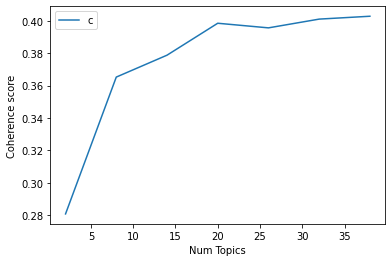

In [ ]:
from gensim.models.ldamodel import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**NOTE:**

* The above plot shows that coherence score increases with the 
number of topics. Choosing the number of topics still depends on our requirement because topic around 20 have good coherence scores but may have repeated keywords in the topic. 
* As the historical data is huge it takes time to compute the coherence measures. Each LDA analysis should have number of topics based on the highest coherence score. After looking at coherence scores for two time frames, we chose to use 20 for all time frames to save out on time and standardize the number of topics.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/gdrive/Shareddrives/IMT-547/topic_1_ldavis_prepared_'+str(num_topics))

In [ ]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/gdrive/Shareddrives/IMT-547/topic_1_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.219818  0.084372       1        1  12.630548
14     0.224765  0.066567       2        1  10.219377
7      0.128261  0.086882       3        1   7.056240
17    -0.229718  0.146302       4        1   6.215901
2      0.032375 -0.047645       5        1   5.116963
0      0.082136  0.102522       6        1   4.868858
1      0.054947  0.040308       7        1   4.712776
12    -0.189475  0.137224       8        1   4.580974
11     0.159063  0.010799       9        1   4.554615
3     -0.079855 -0.178056      10        1   4.126277
9     -0.020604 -0.071416      11        1   3.875746
18    -0.142766  0.072640      12        1   3.818528
13    -0.018359  0.048962      13        1   3.806420
19    -0.026995 -0.082765      14        1   3.693122
5     -0.027275 -0.161952      15        1   3.657329
6      0.084808 -0.065979      16        1   3.646052
8     -0.053784  0.060230      17        1   3.633188
4     -0.110711  0.059869      18        1   3.411924
16     0.015370 -0.195681      19        1   3.273308
10    -0.102000 -0.113182      20        1   3.101854, topic_info=            Term          Freq         Total Category  logprob  loglift
2235      stress  19316.000000  19316.000000  Default  30.0000  30.0000
2403     anxiety  22267.000000  22267.000000  Default  29.0000  29.0000
3131     counsel  13450.000000  13450.000000  Default  28.0000  28.0000
747        crazy  27433.000000  27433.000000  Default  27.0000  27.0000
1806  depression  15478.000000  15478.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
53           new   1286.299281   8518.169803  Topic20  -4.1377   1.5827
1432       major    559.084870   1595.264267  Topic20  -4.9709   2.4247
151     evidence    402.174951   1233.269551  Topic20  -5.3003   2.3526
309          day    567.965984   8908.622166  Topic20  -4.9551   0.7205
1181       every    349.526392  10042.607623  Topic20  -5.4406   0.1152

[1409 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
15249      4  0.023328           ab
15249      5  0.054431           ab
15249     13  0.920150           ab
23689      6  0.968650  abandonment
23689     17  0.028938  abandonment
...      ...       ...          ...
3733      13  0.001925          yrs
3733      14  0.001925          yrs
3733      15  0.983594          yrs
3733      19  0.005775          yrs
15114     11  0.996243       zodiac

[7017 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 15, 8, 18, 3, 1, 2, 13, 12, 4, 10, 19, 14, 20, 6, 7, 9, 5, 17, 11])

**Observations:**

*   As this is the intial phase of COVID, we see very few words realted to COVID. Hence, its seen that the majority of the topics are general texts. Out of 20 topics, only 2 topics conatins words related to COVID.
*   The largest topics i.e Topic 1 & 2 represent general texts.
*   The topics 4 & 8 represent words with respect to COVID and mental health. Some of the words are: cases, outbreak, Wuhan, death, warning, virus, paranoia, patients, warning, chinese. This shows that the news about COVID and its impact had just started.
*   The topic 11 & 14 are interestingly related to election, campaigns and Trump. The words seen are: biden, trump, bernie, campaign, president, republican.



### After declaring global public-health emergency

In [ ]:
data = df_topic_2.cleaned_tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
#data_words
print(data_words[:1][0][:30])

['bay', 'areas', 'st', 'case', 'confirmed', 'santa', 'clara', 'co', 'officials', 'say']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [ ]:
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"loved" + 0.024*"none" + 0.022*"peoples" + 0.021*"entitled" + '
  '0.020*"love" + 0.016*"people" + 0.015*"suicide" + 0.012*"alone" + '
  '0.011*"hate" + 0.010*"time"'),
 (1,
  '0.021*"ass" + 0.017*"didnt" + 0.016*"forming" + 0.013*"youre" + '
  '0.012*"cant" + 0.011*"squad" + 0.009*"well" + 0.009*"like" + 0.009*"get" + '
  '0.009*"friends"'),
 (2,
  '0.027*"uses" + 0.013*"american" + 0.011*"car" + 0.010*"fake" + '
  '0.009*"nixon" + 0.008*"acting" + 0.008*"services" + 0.007*"pure" + '
  '0.007*"idaho" + 0.007*"one"'),
 (3,
  '0.086*"suicide" + 0.032*"ptsd" + 0.016*"literally" + 0.015*"amp" + '
  '0.013*"men" + 0.011*"cover" + 0.011*"go" + 0.010*"professional" + '
  '0.009*"hurt" + 0.008*"hard"'),
 (4,
  '0.012*"music" + 0.012*"find" + 0.011*"stuffed" + 0.011*"ending" + '
  '0.010*"scenes" + 0.009*"storytelling" + 0.008*"emotional" + '
  '0.007*"depressed" + 0.007*"work" + 0.007*"best"'),
 (5,
  '0.043*"meditation" + 0.025*"real" + 0.022*"visual" + 0.021*"sex" + '
  '0.019

### Coherence Score

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.37958246752908903


Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

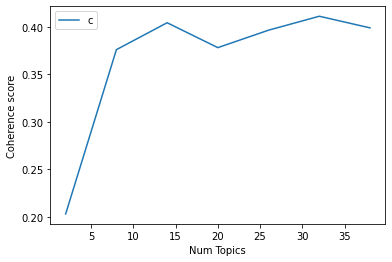

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/gdrive/Shareddrives/IMT-547/topic_2_ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/gdrive/Shareddrives/IMT-547/topic_2_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.226147 -0.068043       1        1  12.588212
19     0.208874 -0.048025       2        1   8.623259
17     0.148524 -0.113043       3        1   5.732694
1      0.146462 -0.000445       4        1   5.200204
10     0.059231 -0.014853       5        1   5.095500
4      0.050672 -0.019127       6        1   4.856880
18    -0.026989  0.152812       7        1   4.845332
0      0.069489  0.056044       8        1   4.800074
6      0.019924  0.078050       9        1   4.646778
3      0.050504  0.061387      10        1   4.633813
7     -0.026465 -0.020856      11        1   4.439279
8      0.053557 -0.041063      12        1   4.287000
12    -0.110143 -0.123993      13        1   4.050844
16    -0.135900 -0.036649      14        1   3.989241
11    -0.068527  0.136818      15        1   3.776966
5     -0.161906 -0.144853      16        1   3.747072
14    -0.116916  0.090975      17        1   3.738644
13    -0.054321  0.147485      18        1   3.724469
9     -0.215427 -0.166880      19        1   3.668196
2     -0.116790  0.074259      20        1   3.555543, topic_info=             Term          Freq         Total Category  logprob  loglift
11126      lonely  19812.000000  19812.000000  Default  30.0000  30.0000
5277   depression  17172.000000  17172.000000  Default  29.0000  29.0000
1924        crazy  21562.000000  21562.000000  Default  28.0000  28.0000
3717       stress  14527.000000  14527.000000  Default  27.0000  27.0000
542       anxiety  14387.000000  14387.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
164           one    591.754678   9782.182946  Topic20  -4.9274   0.5314
80          human    376.209472    969.809606  Topic20  -5.3803   2.3897
55          first    470.133338   3858.619228  Topic20  -5.1575   1.2316
326          said    394.541493   3161.867592  Topic20  -5.3328   1.2555
935         state    346.642711   1320.583928  Topic20  -5.4622   1.9991

[1396 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
2706       2  0.014236   able
2706       3  0.035042   able
2706       5  0.009856   able
2706       7  0.027377   able
2706       8  0.006570   able
...      ...       ...    ...
4972       6  0.834074  youth
4972       8  0.010832  youth
7076       9  0.991776     yr
13391      9  0.977292    yrs
13391     15  0.018233    yrs

[6729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 20, 18, 2, 11, 5, 19, 1, 7, 4, 8, 9, 13, 17, 12, 6, 15, 14, 10, 3])

**Observations:**

*   Since this is just after COVID was declared a a global emergency, overall we do not see many topics related to COVID yet, but we do see a high number of terms realted to mental health. 

*   Topics 13, 16 and 19 talk about COVID and mental health where we can see words like disorder, depsression, deceased, cases and deaths. 

### Before 1 million cases

In [ ]:
data = df_topic_3.cleaned_tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['roughly', 'million', 'masks', 'warehouses', 'around', 'us', 'purchased', 'foreign', 'buyers', 'monday', 'alone', 'according', 'forbes']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
# number of topics
#num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.091*"lonely" + 0.082*"therapy" + 0.014*"us" + 0.009*"world" + 0.009*"one" '
  '+ 0.008*"battle" + 0.008*"need" + 0.008*"huge" + 0.008*"time" + '
  '0.008*"still"'),
 (1,
  '0.014*"deaths" + 0.014*"cases" + 0.014*"holed" + 0.013*"new" + 0.011*"us" + '
  '0.010*"level" + 0.009*"animal" + 0.009*"increase" + 0.008*"dr" + '
  '0.008*"number"'),
 (2,
  '0.151*"anxiety" + 0.016*"curing" + 0.015*"like" + 0.012*"going" + '
  '0.009*"really" + 0.009*"fear" + 0.008*"good" + 0.008*"partying" + '
  '0.008*"seems" + 0.007*"self"'),
 (3,
  '0.033*"people" + 0.027*"emotion" + 0.021*"faces" + 0.019*"weeks" + '
  '0.019*"afraid" + 0.018*"lives" + 0.018*"already" + 0.018*"crazy" + '
  '0.017*"americans" + 0.017*"th"'),
 (4,
  '0.024*"self" + 0.023*"feel" + 0.019*"crafting" + 0.016*"care" + '
  '0.014*"stress" + 0.013*"people" + 0.009*"room" + 0.008*"us" + '
  '0.006*"twitter" + 0.006*"quarantine"'),
 (5,
  '0.051*"years" + 0.034*"old" + 0.026*"quarantine" + 0.026*"content" + '
  '0.023*"year" +

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
#DATA_PATH ='/gdrive/Shareddrives/IMT-547/data'
#/Final_Data/
LDAvis_data_filepath = os.path.join('/gdrive/Shareddrives/IMT-547/topic_3_ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/gdrive/Shareddrives/IMT-547/topic_3_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.141838  0.041737       1        1  9.898533
17    -0.128279  0.015416       2        1  6.343299
6      0.006484  0.093938       3        1  5.936250
18    -0.032748  0.009557       4        1  5.399967
13     0.026852 -0.083247       5        1  5.310609
15    -0.066504 -0.060980       6        1  5.248945
3     -0.072776 -0.051221       7        1  5.169471
2     -0.081673  0.101246       8        1  4.960020
1      0.222521 -0.039404       9        1  4.823362
12    -0.067545  0.080346      10        1  4.620712
0      0.037795  0.103803      11        1  4.603638
4     -0.017602 -0.003665      12        1  4.572881
11    -0.072765 -0.146729      13        1  4.342239
14    -0.107545 -0.120547      14        1  4.278578
5      0.170777  0.055648      15        1  4.264257
9      0.028047 -0.075518      16        1  4.155489
19    -0.021743  0.164571      17        1  4.132743
16     0.137057  0.091619      18        1  4.132439
7      0.115065 -0.159256      19        1  3.913829
10     0.066419 -0.017315      20        1  3.892738, topic_info=            Term          Freq         Total Category  logprob  loglift
3895     anxiety  21869.000000  21869.000000  Default  30.0000  30.0000
5274  depression  16697.000000  16697.000000  Default  29.0000  29.0000
4457      lonely  11251.000000  11251.000000  Default  28.0000  28.0000
3163     therapy   7169.000000   7169.000000  Default  27.0000  27.0000
1329       crazy  18041.000000  18041.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1227   important    317.744933   1809.556774  Topic20  -5.4474   1.5065
280          amp    409.163283   9327.083294  Topic20  -5.1946   0.1195
1149    everyone    326.778044   2658.210230  Topic20  -5.4194   1.1499
159        right    333.655741   5603.947542  Topic20  -5.3986   0.4249
406         know    319.938237   6757.559863  Topic20  -5.4406   0.1958

[1484 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
3985      12  0.987648    abo
12290     16  0.993343    abt
2497       8  0.003570  abuse
2497       9  0.012494  abuse
2497      12  0.981662  abuse
...      ...       ...    ...
2992      19  0.128153  youve
2992      20  0.230675  youve
5641       4  0.912111   zoom
5641       5  0.003281   zoom
5641      13  0.082024   zoom

[7680 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 18, 7, 19, 14, 16, 4, 3, 2, 13, 1, 5, 12, 15, 6, 10, 20, 17, 8, 11])

**Observations:**


*   The dataset used represents a time period when COVID cases were rising. Hence, we see more number of topics containing words related to COVID and mental health. The Top 30 most salient terms include anxiety, depression, lonely, president, signed, breath. This could be because at this time there were strict lock down rules to prevent COVID from spreading. 
*   The topics with COVID and mental terms are: Topics 3, 5, 7, 11, 12, 15, 17, 18, 19



### After 1 million cases

In [ ]:
data = df_topic_4.cleaned_tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['first', 'task', 'force', 'briefings', 'jared', 'kushner', 'wh', 'aide', 'presidents', 'son', 'law', 'speaking', 'hi']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
# number of topics
#num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"live" + 0.015*"please" + 0.009*"home" + 0.008*"order" + '
  '0.008*"place" + 0.007*"want" + 0.007*"stream" + 0.007*"means" + '
  '0.007*"stay" + 0.007*"tired"'),
 (1,
  '0.022*"stress" + 0.016*"crazy" + 0.012*"time" + 0.011*"social" + '
  '0.009*"people" + 0.009*"yelling" + 0.008*"partying" + 0.008*"get" + '
  '0.008*"distancing" + 0.008*"going"'),
 (2,
  '0.034*"shortness" + 0.027*"breath" + 0.025*"corona" + 0.020*"new" + '
  '0.019*"know" + 0.012*"rate" + 0.011*"also" + 0.009*"past" + 0.008*"knew" + '
  '0.008*"cases"'),
 (3,
  '0.032*"amp" + 0.012*"take" + 0.012*"social" + 0.011*"anxiety" + '
  '0.011*"time" + 0.011*"dr" + 0.010*"ask" + 0.009*"talk" + 0.009*"act" + '
  '0.008*"emotional"'),
 (4,
  '0.134*"depression" + 0.030*"great" + 0.019*"like" + 0.016*"eat" + '
  '0.014*"look" + 0.008*"counsel" + 0.008*"millennials" + 0.007*"always" + '
  '0.007*"never" + 0.007*"get"'),
 (5,
  '0.042*"signed" + 0.020*"sick" + 0.016*"back" + 0.015*"response" + '
  '0.011*"going" + 

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/gdrive/Shareddrives/IMT-547/topic_4_ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/gdrive/Shareddrives/IMT-547/topic_4_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19     0.148391  0.127826       1        1  7.625447
13     0.121114  0.039879       2        1  7.027857
4      0.003768 -0.020562       3        1  5.255107
17     0.102126  0.029930       4        1  5.177829
15     0.046796  0.117486       5        1  5.087578
14     0.076259  0.099378       6        1  4.982655
9      0.046373 -0.121802       7        1  4.908771
3     -0.035744 -0.043884       8        1  4.854938
7     -0.146823 -0.011986       9        1  4.844863
18    -0.030634 -0.094232      10        1  4.813467
8      0.003206 -0.130517      11        1  4.802427
10    -0.129486  0.171632      12        1  4.777054
0     -0.078537 -0.151188      13        1  4.769381
5      0.019529 -0.036966      14        1  4.752174
6      0.089021 -0.078101      15        1  4.710463
1      0.069606 -0.052018      16        1  4.650667
12    -0.025462  0.030322      17        1  4.567208
16     0.102318  0.021431      18        1  4.460876
2     -0.191998  0.071192      19        1  4.379461
11    -0.189820  0.032180      20        1  3.551777, topic_info=            Term          Freq         Total Category  logprob  loglift
5274  depression  15978.000000  15978.000000  Default  30.0000  30.0000
3895     anxiety  17809.000000  17809.000000  Default  29.0000  29.0000
1802      stress  18194.000000  18194.000000  Default  28.0000  28.0000
4457      lonely   9422.000000   9422.000000  Default  27.0000  27.0000
6002     suicide   6556.000000   6556.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1156       youre    331.101480   3547.404504  Topic20  -5.3146   0.9662
22         trump    345.104008   6126.503054  Topic20  -5.2732   0.4612
53           one    345.425328   7082.858970  Topic20  -5.2722   0.3171
221           th    314.638878   3109.502400  Topic20  -5.3656   1.0469
1329       crazy    306.646482  16523.193408  Topic20  -5.3913  -0.6491

[1496 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2497      2  0.012427  abuse
2497      3  0.001775  abuse
2497      7  0.113614  abuse
2497      9  0.676358  abuse
2497     10  0.060357  abuse
...     ...       ...    ...
1156     20  0.093308  youre
6136      5  0.990584  youth
5641      6  0.047769   zoom
5641      9  0.003412   zoom
5641     10  0.945137   zoom

[7898 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 14, 5, 18, 16, 15, 10, 4, 8, 19, 9, 11, 1, 6, 7, 2, 13, 17, 3, 12])

**Observations:**


*   We see more COVID and mental health related terms in Top-30 Most Salient Terms like corona, quarantine, anxiety, trump, emotion, positive etc. 
*   The topics contains terms related to COVID are: 9, 19, 12, 5, 18, 10, 15. 
*   We also see that people are starting to change their life and the impact of COVID situation. We see new terms like social distancing, quarantine, new york(topic 19), prayer, patients etc. 




### Before UK authorized the vaccine

In [ ]:
data = df_topic_5.cleaned_tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['oh', 'new', 'industry', 'research', 'report', 'looks', 'store', 'new', 'improved', 'related', 'attacks', 'scoop']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [ ]:
# number of topics
#num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"free" + 0.013*"weight" + 0.013*"needing" + 0.013*"amp" + 0.012*"ur" '
  '+ 0.010*"trans" + 0.008*"depressed" + 0.008*"bts" + 0.008*"future" + '
  '0.008*"life"'),
 (1,
  '0.185*"stress" + 0.023*"meditation" + 0.017*"try" + 0.011*"things" + '
  '0.010*"trump" + 0.009*"looks" + 0.009*"like" + 0.008*"written" + '
  '0.007*"imagine" + 0.006*"cannot"'),
 (2,
  '0.021*"biden" + 0.019*"heart" + 0.019*"pain" + 0.018*"team" + 0.014*"tweet" '
  '+ 0.013*"joe" + 0.011*"issues" + 0.011*"death" + 0.011*"thats" + '
  '0.010*"problems"'),
 (3,
  '0.098*"anxiety" + 0.016*"work" + 0.012*"every" + 0.012*"people" + '
  '0.012*"amp" + 0.009*"time" + 0.009*"years" + 0.007*"signs" + 0.007*"many" + '
  '0.007*"got"'),
 (4,
  '0.042*"real" + 0.019*"pardon" + 0.017*"crimes" + 0.016*"pardons" + '
  '0.014*"vaccine" + 0.013*"seasonal" + 0.010*"make" + 0.010*"take" + '
  '0.009*"crazy" + 0.009*"handily"'),
 (5,
  '0.068*"special" + 0.050*"durham" + 0.045*"barr" + 0.023*"ag" + '
  '0.020*"suicide" +

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/gdrive/Shareddrives/IMT-547/topic_5_ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/gdrive/Shareddrives/IMT-547/topic_5_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.162960 -0.024218       1        1  9.761661
7      0.171992 -0.003982       2        1  8.833413
16     0.141222  0.026272       3        1  8.295763
3      0.054250 -0.115475       4        1  6.659793
19    -0.011450 -0.118612       5        1  5.185442
4      0.090353  0.061449       6        1  5.113116
14    -0.110758 -0.122932       7        1  4.996061
18    -0.196450 -0.103977       8        1  4.740319
17     0.066802 -0.158038       9        1  4.473144
10    -0.171765  0.081073      10        1  4.227632
11     0.092925  0.080606      11        1  4.153041
8      0.125978  0.113031      12        1  4.112616
1     -0.051825  0.034525      13        1  3.989633
12    -0.030803 -0.080340      14        1  3.885353
0      0.001260 -0.014016      15        1  3.836129
5     -0.162157  0.155413      16        1  3.835113
6     -0.121885 -0.005115      17        1  3.715871
13     0.035546 -0.020580      18        1  3.659927
9     -0.013203  0.155807      19        1  3.393057
2     -0.072992  0.059109      20        1  3.132918, topic_info=            Term          Freq         Total Category  logprob  loglift
1445       crazy  35084.000000  35084.000000  Default  30.0000  30.0000
604       stress  20716.000000  20716.000000  Default  29.0000  29.0000
2756      lonely  17964.000000  17964.000000  Default  28.0000  28.0000
1798     anxiety  21767.000000  21767.000000  Default  27.0000  27.0000
2090  depression  16514.000000  16514.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
255        thats    896.362321   5987.919671  Topic20  -4.5268   1.5641
301         want    690.193551   5595.817014  Topic20  -4.7882   1.3704
3464    approach    316.661971    616.365930  Topic20  -5.5674   2.7972
23           get    587.377211  13489.707446  Topic20  -4.9495   0.3292
604       stress    501.504536  20716.754738  Topic20  -5.1076  -0.2579

[1429 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
25913     14  0.993285     ableism
2490       5  0.981279     absence
2623       1  0.373085  absolutely
2623       2  0.027257  absolutely
2623       3  0.004543  absolutely
...      ...       ...         ...
4323      20  0.939602       youth
1649       1  0.090774     youtube
1649       3  0.119822     youtube
1649      10  0.025417     youtube
1649      14  0.762504     youtube

[7331 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 8, 17, 4, 20, 5, 15, 19, 18, 11, 12, 9, 2, 13, 1, 6, 7, 14, 10, 3])

**Observations:**

*   We were not able to find terms related to the vaccine. It is possible that our keywords did not account for vaccine realted terms and hence our results are inconclusive.

* We also see topics 10, 13, 20 include terms like biden and trump which could mean that people were talking more about the election than the vaccine.

### After UK authorized the vaccine

In [ ]:
data = df_topic_6.cleaned_tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['hungarian', 'mep', 'resigns', 'sex', 'party', 'broke', 'lockdown', 'rules']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
# number of topics
#num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"year" + 0.029*"tw" + 0.025*"rt" + 0.020*"meditation" + 0.013*"zoom" '
  '+ 0.013*"family" + 0.012*"levels" + 0.012*"high" + 0.012*"productivity" + '
  '0.011*"old"'),
 (1,
  '0.011*"episode" + 0.011*"lockdown" + 0.009*"see" + 0.009*"wanna" + '
  '0.008*"new" + 0.008*"states" + 0.008*"study" + 0.008*"seek" + '
  '0.008*"winter" + 0.007*"home"'),
 (2,
  '0.051*"emotion" + 0.029*"attorney" + 0.020*"social" + 0.020*"please" + '
  '0.015*"youre" + 0.013*"game" + 0.012*"going" + 0.010*"still" + 0.009*"many" '
  '+ 0.009*"mens"'),
 (3,
  '0.064*"trump" + 0.052*"biden" + 0.036*"special" + 0.023*"vaccine" + '
  '0.019*"team" + 0.018*"final" + 0.016*"jobs" + 0.015*"donald" + 0.012*"wh" + '
  '0.011*"investigation"'),
 (4,
  '0.058*"hunter" + 0.035*"biden" + 0.033*"general" + 0.030*"special" + '
  '0.025*"joe" + 0.023*"confidently" + 0.017*"multiple" + 0.017*"today" + '
  '0.013*"expected" + 0.011*"bill"'),
 (5,
  '0.037*"new" + 0.030*"day" + 0.017*"every" + 0.011*"vaccine" + 0.011

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/gdrive/Shareddrives/IMT-547/topic_6_ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/gdrive/Shareddrives/IMT-547/topic_6_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.203636 -0.034025       1        1  9.658520
14    -0.134870 -0.065612       2        1  8.315776
12    -0.076769  0.024578       3        1  5.870223
7     -0.178589 -0.008660       4        1  5.744566
6     -0.122039  0.020541       5        1  5.621807
5      0.238417  0.117540       6        1  5.606466
3      0.170917 -0.209809       7        1  5.080160
19    -0.036788 -0.007382       8        1  4.981683
11    -0.138140 -0.020636       9        1  4.861227
17     0.045844  0.050218      10        1  4.559952
13     0.023813 -0.091940      11        1  4.524594
0      0.023712  0.086879      12        1  4.479271
8     -0.001734 -0.008548      13        1  4.303876
16    -0.042387 -0.015787      14        1  4.163423
4      0.212876 -0.160681      15        1  4.087132
2      0.012681  0.041557      16        1  4.037836
10    -0.046875 -0.062310      17        1  3.768679
1      0.076587  0.179109      18        1  3.741054
15     0.044052  0.179606      19        1  3.563315
18     0.132927 -0.014638      20        1  3.030442, topic_info=             Term          Freq         Total Category  logprob  loglift
4823   depression  15425.000000  15425.000000  Default  30.0000  30.0000
10421     therapy  16254.000000  16254.000000  Default  29.0000  29.0000
11038      stress  13994.000000  13994.000000  Default  28.0000  28.0000
1238       lonely  10613.000000  10613.000000  Default  27.0000  27.0000
5278      anxiety  17535.000000  17535.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
681       working    474.402109   1723.944181  Topic20  -5.0907   2.2061
209          need    734.536130  10685.339938  Topic20  -4.6535   0.8191
1757        final    437.288431   3405.146226  Topic20  -5.1722   1.4440
2265        short    326.265206    536.203846  Topic20  -5.4650   2.9997
419          bill    359.815914   2851.418501  Topic20  -5.3672   1.4265

[1477 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2036      2  0.024403    ab
2036      6  0.008134    ab
2036      8  0.004067    ab
2036     17  0.955768    ab
684       1  0.058767  able
...     ...       ...   ...
7414      8  0.000660  zoom
7414      9  0.027047  zoom
7414     12  0.964454  zoom
7414     16  0.001979  zoom
7414     19  0.005277  zoom

[7676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 15, 13, 8, 7, 6, 4, 20, 12, 18, 14, 1, 9, 17, 5, 3, 11, 2, 16, 19])

**Observations:**

*   There is no clear relation between the vaccine authorization and mental health.

* We can see topics 2 and 7 include term the term vaccine, but it appears the election is still overshadowing the vaccine authorization because trump and biden are seen with higher frequencies.

# Research Limitations
Representation issue:
- Data is not representative of population. It is only limited to Twitter users
- Not representative of all mental health issues 
- Limiting data to hashtags and keywords could lead to exclusion of several topics realted to COVID and mental health
- Our data may not represent all groups from particular location


# Ethical Considerations
We have taken following steps to make sure we do not have ethical /privacy issue in our research.

- We have extracted data based on keywords rather than users so although we have not explicitly got permissions for using the data from individual users.
- Our finding are at macros level, we have not seperate our data by users/race or different demography of user.

# Conclusion


* The data analysis on the Tweets collected definately shows that Twitter users discuss mental health issues on the social media. The tweets collected were searched and filtered based on COVID and Mental health related keywords. The historical data collected over the timeline of COVID was analysed over the major events in 2020 related to COVID. 

* The events we concentrated on reflected in the Tweets aligning  and correlates with our expectation. The sentiment analysis and the Topic modeling along these events shows that the text in the Tweets represents the changes and impact due to COVID. 

* During the intial COVID phase, we saw that the tweets related to COVID are few. Some of the words seen during this period are : cases, outbreak, Wuhan, death, warning, virus, paranoia, patients, warning, chinese. In the rising phase, we see how COVID has impacted the lives of people. The Top 30 most salient terms include anxiety, depression, lonely, president, signed, breath. This could be because at this time there were strict lock down rules to prevent COVID from spreading. When the COVID cases hit the peak of 1 million, we see new words like social distancing, quarantine, new york, mask, prayer, patients, death, cases etc.

* During the last phase, due to authorization and availability of the vaccine, we see more positive texts. This could also be due to less severe lockdown rules and celebrations such as Thanksgiving, Chistmas and New Year that might have helped to release stress. 

# Future work

We would like to expand our research work to improve quaility of our findings.  
* As we mentioned earlier, we only collected 10,000 tweets for each day but we did not validate if these 10000 tweets are representative of all tweets of that day or not. We should fetch all tweets of couple of days and validate if covid/mental tweets ratio and sentiment is same as what we get in 10,000 sample tweets.
* Twitter dev are working on enabling geo filter for academic research pack. Once avaiable, we would like to fecth data again and focus on redoing this reasech only for 15 cities that we have identified
* Due to time limitation, we opted to use seperate topic modeling each major events. In future, we would like to use [dynamic topic modeling](https://radimrehurek.com/gensim/models/ldaseqmodel.html) and see trend of different topic over time.
* We collected the Tweets by searching and filtering based on COVID keywords and Mental health related keywords independently into different dataframes. In the future, we look forward to mine Tweets that contain both the keywords.



# Credit listing

Aftab - Setting up environment, Data Collection, Preperation, Data Cleaning, Sentiment Analysis, Time Series analysis of Vader Polarity Scores

Anusha - Data Collection, Data Cleaning, Removing Duplicates, Preliminary Analysis and vizualization, Topic Modeling, LDA and Coherence measure

Sahana - Research Problem Statement, Questions, Data Story telling, Data Preprocessing, Senitment analysis
